# Aprendizaje Automático

# Trabajo Práctico Final

## Integrantes: Pozzo Micaela, Vercesi Patricio

## Exploración de datos

### Importación

#### Librerías

In [ ]:
!pip install pandas -q
!pip install seaborn -q
!pip install shap -q
!pip install optuna -q
!pip install tensorflow -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.6/230.6 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks
import matplotlib.dates as mdates

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import shap
import optuna
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.metrics import F1Score
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import mean_squared_error
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import joblib

In [ ]:
import warnings
warnings.simplefilter('ignore')

#### Dataset

**Comentar dependiendo de donde se saca el dataset**

In [ ]:
from google.colab import drive, files
#drive.mount('/content/drive') # desde el Drive
files.upload();                # desde la PC

Saving weatherAUS.csv to weatherAUS.csv


In [ ]:
# Carga datos de dataset
# Contiene aproximadamente 10 años de observaciones diarias de variables climáticas:
# temperatura, dirección y velocidad del viento, humedad, presión, nubosidad, y cantidad de lluvia en mm.
file_path = 'weatherAUS.csv'
df = pd.read_csv(file_path, sep=',',engine='python')

### Vista general de los datos

In [ ]:
df

Unnamed: 0        Date Location  MinTemp  MaxTemp  Rainfall  \
0                0  2008-12-01   Albury     13.4     22.9       0.6   
1                1  2008-12-02   Albury      7.4     25.1       0.0   
2                2  2008-12-03   Albury     12.9     25.7       0.0   
3                3  2008-12-04   Albury      9.2     28.0       0.0   
4                4  2008-12-05   Albury     17.5     32.3       1.0   
...            ...         ...      ...      ...      ...       ...   
145407      145454  2017-06-20    Uluru      3.5     21.8       0.0   
145408      145455  2017-06-21    Uluru      2.8     23.4       0.0   
145409      145456  2017-06-22    Uluru      3.6     25.3       0.0   
145410      145457  2017-06-23    Uluru      5.4     26.9       0.0   
145411      145458  2017-06-24    Uluru      7.8     27.0       0.0   

        Evaporation  Sunshine WindGustDir  WindGustSpeed  ... Humidity3pm  \
0               NaN       NaN           W           44.0  ...        22.0   
1               NaN       NaN         WNW           44.0  ...        25.0   
2               NaN       NaN         WSW           46.0  ...        30.0   
3               NaN       NaN          NE           24.0  ...        16.0   
4               NaN       NaN           W           41.0  ...        33.0   
...             ...       ...         ...            ...  ...         ...   
145407          NaN       NaN           E           31.0  ...        27.0   
145408          NaN       NaN           E           31.0  ...        24.0   
145409          NaN       NaN         NNW           22.0  ...        21.0   
145410          NaN       NaN           N           37.0  ...        24.0   
145411          NaN       NaN          SE           28.0  ...        24.0   

       Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0           1007.7       1007.1       8.0       NaN     16.9     21.8   
1           1010.6       1007.8       NaN       NaN     17.2     24.3   
2           1007.6       1008.7       NaN       2.0     21.0     23.2   
3           1017.6       1012.8       NaN       NaN     18.1     26.5   
4           1010.8       1006.0       7.0       8.0     17.8     29.7   
...            ...          ...       ...       ...      ...      ...   
145407      1024.7       1021.2       NaN       NaN      9.4     20.9   
145408      1024.6       1020.3       NaN       NaN     10.1     22.4   
145409      1023.5       1019.1       NaN       NaN     10.9     24.5   
145410      1021.0       1016.8       NaN       NaN     12.5     26.1   
145411      1019.4       1016.5       3.0       2.0     15.1     26.0   

        RainToday  RainTomorrow  RainfallTomorrow  
0              No            No               0.0  
1              No            No               0.0  
2              No            No               0.0  
3              No            No               1.0  
4              No            No               0.2  
...           ...           ...               ...  
145407         No            No               0.0  
145408         No            No               0.0  
145409         No            No               0.0  
145410         No            No               0.0  
145411         No            No               0.0  

[145412 rows x 25 columns]

In [ ]:
df.describe()

Unnamed: 0        MinTemp        MaxTemp       Rainfall  \
count  145412.000000  143928.000000  144159.000000  142152.000000   
mean    72728.184393      12.195873      23.223176       2.361516   
std     41990.722236       6.398018       7.118770       8.479338   
min         0.000000      -8.500000      -4.800000       0.000000   
25%     36362.750000       7.600000      17.900000       0.000000   
50%     72727.500000      12.000000      22.600000       0.000000   
75%    109093.250000      16.900000      28.200000       0.800000   
max    145458.000000      33.900000      48.100000     371.000000   

        Evaporation      Sunshine  WindGustSpeed   WindSpeed9am  \
count  82658.000000  75616.000000  135159.000000  143645.000000   
mean       5.468616      7.611241      40.036564      14.044742   
std        4.193871      3.785612      13.607212       8.915610   
min        0.000000      0.000000       6.000000       0.000000   
25%        2.600000      4.800000      31.000000       7.000000   
50%        4.800000      8.400000      39.000000      13.000000   
75%        7.400000     10.600000      48.000000      19.000000   
max      145.000000     14.500000     135.000000     130.000000   

        WindSpeed3pm    Humidity9am    Humidity3pm    Pressure9am  \
count  142351.000000  142759.000000  140907.000000  130351.000000   
mean       18.663164      68.877290      51.537432    1017.649277   
std         8.810276      19.029576      20.796720       7.107132   
min         0.000000       0.000000       0.000000     980.500000   
25%        13.000000      57.000000      37.000000    1012.900000   
50%        19.000000      70.000000      52.000000    1017.600000   
75%        24.000000      83.000000      66.000000    1022.400000   
max        87.000000     100.000000     100.000000    1041.000000   

         Pressure3pm      Cloud9am      Cloud3pm        Temp9am  \
count  130388.000000  89542.000000  86076.000000  143646.000000   
mean     1015.255184      4.447287      4.509770      16.992780   
std         7.037981      2.887161      2.720306       6.488045   
min       977.100000      0.000000      0.000000      -7.200000   
25%      1010.400000      1.000000      2.000000      12.300000   
50%      1015.200000      5.000000      5.000000      16.700000   
75%      1020.000000      7.000000      7.000000      21.600000   
max      1039.600000      9.000000      9.000000      40.200000   

             Temp3pm  RainfallTomorrow  
count  141805.000000     142153.000000  
mean       21.685249          2.361242  
std         6.936358          8.479084  
min        -5.400000          0.000000  
25%        16.600000          0.000000  
50%        21.100000          0.000000  
75%        26.400000          0.800000  
max        46.700000        371.000000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145412 entries, 0 to 145411
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        145412 non-null  int64  
 1   Date              145412 non-null  object 
 2   Location          145412 non-null  object 
 3   MinTemp           143928 non-null  float64
 4   MaxTemp           144159 non-null  float64
 5   Rainfall          142152 non-null  float64
 6   Evaporation       82658 non-null   float64
 7   Sunshine          75616 non-null   float64
 8   WindGustDir       135096 non-null  object 
 9   WindGustSpeed     135159 non-null  float64
 10  WindDir9am        134850 non-null  object 
 11  WindDir3pm        141186 non-null  object 
 12  WindSpeed9am      143645 non-null  float64
 13  WindSpeed3pm      142351 non-null  float64
 14  Humidity9am       142759 non-null  float64
 15  Humidity3pm       140907 non-null  float64
 16  Pressure9am       13

## Preprocesamiento

### Splitting

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
df_train_copy = df_train.copy()
df_test_copy = df_test.copy()


### Preprocesamiento base

In [ ]:
def filter(df):
    df.drop(columns=['Unnamed: 0'], inplace = True)

    df.sort_values(by=['Date', 'Location'], inplace = True)
    df.reset_index(drop=True, inplace=True)

    # Filtrado de lugares que son de interés
    locations = ["Sydney", "SydneyAirport", "Canberra", "Melbourne", "MelbourneAirport"]
    df = df[df['Location'].isin(locations)]
    df.reset_index(drop=True, inplace=True)

    df = df.drop(columns=["Location"])

    return df

df_train = filter(df_train)

Empezamos pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

preprocesamiento = Pipeline([
    ('filter', FunctionTransformer(filter))
])

### Variables categóricas y su codificación

In [ ]:
print(df_train.select_dtypes(exclude=['float', 'int']).columns)

Index(['Date', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')


Empezamos un subpipeline

In [ ]:
categorical_features = Pipeline([])
preprocesamiento.steps.append(('categorical_features', categorical_features))

#### Fecha

In [ ]:
def datecolumn2dateformat(df):
    df['Date'] = pd.to_datetime(df['Date'])
    return df

df_train = datecolumn2dateformat(df_train)

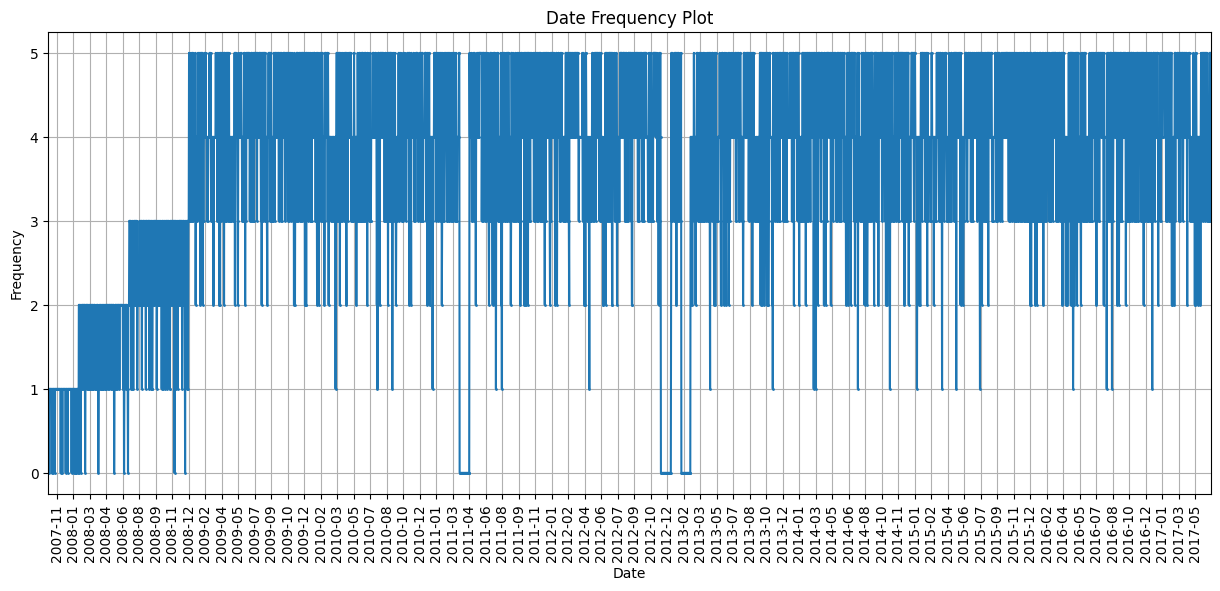

In [ ]:
# Calculamos cuantos datos de cada día tenemos
date_range = pd.date_range(start=df_train['Date'].min(), end=df_train['Date'].max())
date_frequency = df_train.Date
date_frequency = df_train.groupby('Date').size().reindex(date_range, fill_value=0).reset_index(name='Frequency')
date_frequency = date_frequency.rename(columns={'index': 'Date'})

# Plot the date frequency
plt.figure(figsize=(15, 6))
plt.plot(date_frequency['Date'], date_frequency['Frequency'], marker='o', markersize = 1)
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Date Frequency Plot')
plt.xlim(date_frequency['Date'].min(), date_frequency['Date'].max())
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=50))  # Set the interval between ticks
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format the date labels

plt.xticks(rotation=90)
plt.grid()
plt.show()

Codificación

Columna del número de día

In [ ]:
def add_day_number(df):
    #Creamos columna que indique el tiempo pasado
    #elegimos un día random como referencia:
    reference_date = pd.to_datetime('2012-12-12')
    df['DayNumber'] = (df['Date'] - reference_date).dt.days
    return df

df_train = add_day_number(df_train)

Columnas del día del año codificadas trigonométricamente

In [ ]:
def add_trig_date(df):
    # Para una mayor interpretabilidad, rotamos el calendario dejando la mitad del verano en los -90°
    day_of_midsummer = 30 + 15 - 10 # mes + medio mes - 10 días del final de diciembre

    rotated_angle_of_the_year = (df.Date.dt.day_of_year - day_of_midsummer) * 2 * np.pi / 365.25

    df['Autumness'] = (np.sin(rotated_angle_of_the_year) + 1) / 2
    df['Summerness'] = (np.cos(rotated_angle_of_the_year) + 1) / 2
    return df

df_train = add_trig_date(df_train)

In [ ]:
df_train[["Date", "Summerness", "Autumness"]]

Date  Summerness     Autumness
0     2007-11-01    0.466159  1.146554e-03
1     2007-11-02    0.474745  6.382380e-04
2     2007-11-03    0.483338  2.776915e-04
3     2007-11-05    0.500538  2.889877e-07
4     2007-11-06    0.509138  8.351511e-05
...          ...         ...           ...
12806 2017-06-24    0.128500  8.346452e-01
12807 2017-06-24    0.128500  8.346452e-01
12808 2017-06-24    0.128500  8.346452e-01
12809 2017-06-24    0.128500  8.346452e-01
12810 2017-06-24    0.128500  8.346452e-01

[12811 rows x 3 columns]

Visualización de como varían las variables a lo largo del tiempo

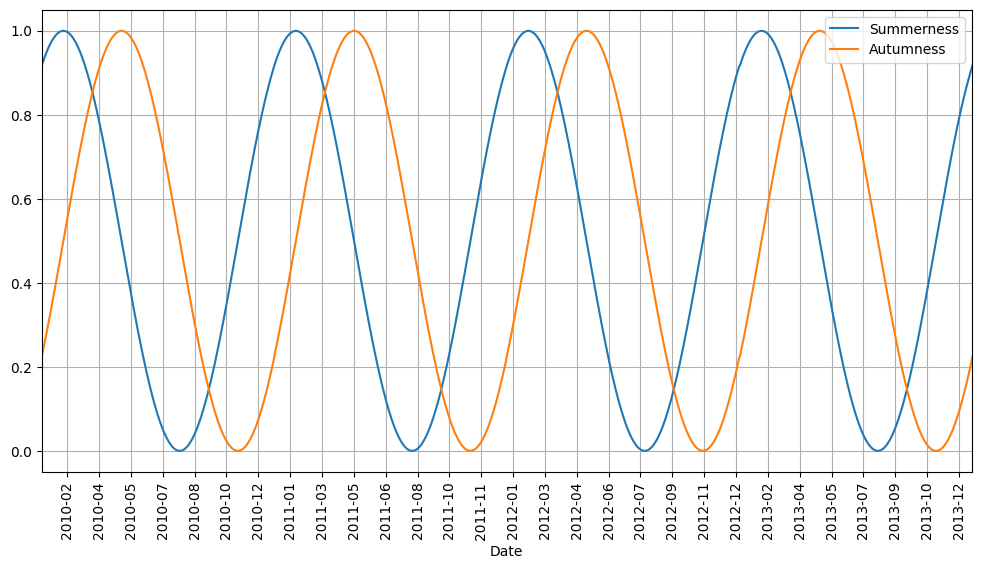

In [ ]:
date_frequency = add_trig_date(date_frequency)

# Plot the date frequency
plt.figure(figsize=(12, 6))
plt.plot(date_frequency['Date'], date_frequency['Summerness'], label = 'Summerness')
plt.plot(date_frequency['Date'], date_frequency['Autumness'], label = 'Autumness')
plt.xlabel('Date')
plt.xlim(pd.to_datetime('2010-01-01'), pd.to_datetime('2013-12-31'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=50))  # Set the interval between ticks
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format the date labels
plt.xticks(rotation=90)
plt.legend()  # Add a legend to distinguish the lines
plt.grid()
plt.show()

In [ ]:
df_train[["Date", "Summerness", "Autumness"]][df_train['Date'] == '2010-03-21']

Date  Summerness  Autumness
2532 2010-03-21    0.857522    0.84954

Como vemos, en el límite entre dos estaciones ambos valores dan altos

In [ ]:
def drop_normal_date(df):
    return df.drop(columns=["Date"])

df_train = drop_normal_date(df_train)

Creamos subsubpipeline y la agregamos

In [ ]:
date_codification = Pipeline([
    ('date_format', FunctionTransformer(datecolumn2dateformat)),
    ('add_day_number', FunctionTransformer(add_day_number)),
    ('add_trig_date', FunctionTransformer(add_trig_date)),
    ('drop_normal_date', FunctionTransformer(drop_normal_date))
])

In [ ]:
categorical_features.steps.append(('date_codification', date_codification))

#### Viento

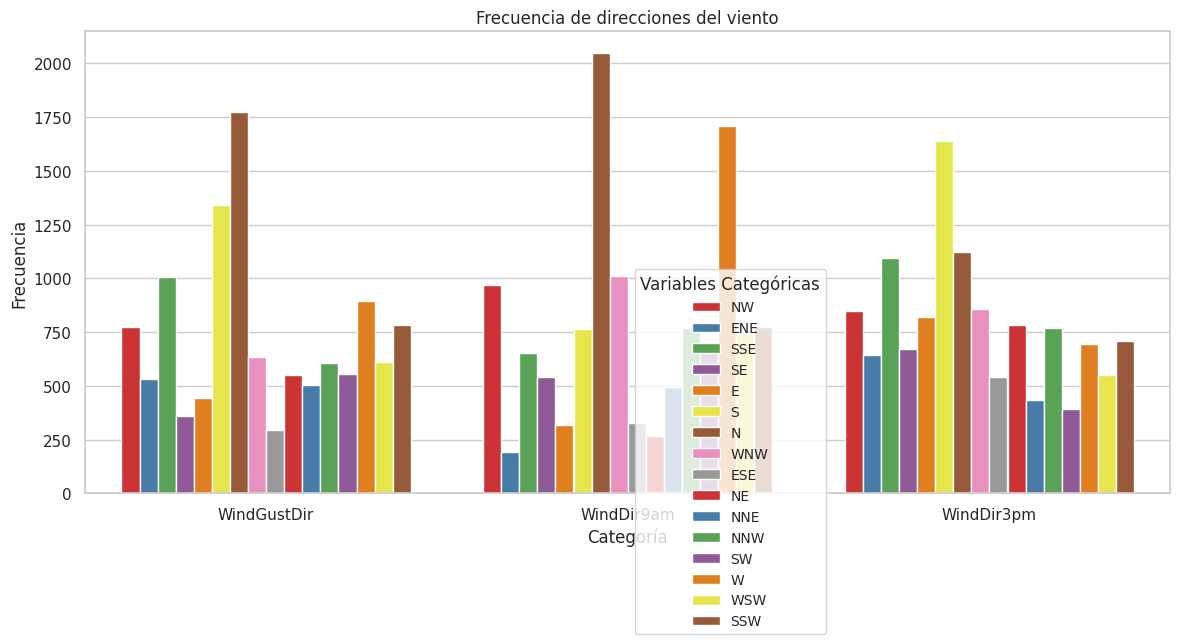

In [ ]:
categorias =  ['WindGustDir', 'WindDir9am', 'WindDir3pm']

plt.figure(figsize=(14, 6))
sns.set(style="whitegrid")
sns.countplot(data=df_train.melt(value_vars=categorias), x='variable', hue='value', palette='Set1', order=categorias)
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de direcciones del viento')

# Establece la ubicación de la referencia en la esquina superior izquierda
plt.legend(title='Variables Categóricas', loc='upper left', fontsize='small')

# Ajusta la orientación de las leyendas
plt.legend(title='Variables Categóricas', loc='upper left', fontsize='small', bbox_to_anchor=(0.5, 0.5), ncol=1)

plt.show()

Codificación

In [ ]:
dir2ang = {
    'E': 0,
    'ESE': 22.5,
    'SE': 45,
    'SSE': 67.5,
    'S': 90,
    'SSW': 112.5,
    'SW': 135,
    'WSW': 157.5,
    'W': 180,
    'WNW': 202.5,
    'NW': 225,
    'NNW': 247.5,
    'N': 270,
    'NNE': 292.5,
    'NE': 315,
    'ENE': 337.5
}

In [ ]:
def dirspeed2velxy(dire, speed):
    if pd.isna(dire) or pd.isna(speed):
        return np.nan, np.nan

    angle = dir2ang[dire]
    sin = np.sin(np.radians(angle))
    cos = np.cos(np.radians(angle))
    vely = sin * speed
    velx = cos * speed
    return velx, vely

Transformamos los 3 pares de columnas con datos sobre el viento

In [ ]:
def add_velxy(df):
    # Create new columns for sine and cosine of wind direction angles
    #9am
    aux = df.apply(lambda row: dirspeed2velxy(row['WindDir9am'], row['WindSpeed9am']), axis=1)
    df[['Wind9amVelX', 'Wind9amVelY']] = pd.Series(zip(*aux))

    #3pm
    aux = df.apply(lambda row: dirspeed2velxy(row['WindDir3pm'], row['WindSpeed3pm']), axis=1)
    df[['Wind3pmVelX', 'Wind3pmVelY']] = pd.Series(zip(*aux))

    #gust
    aux = df.apply(lambda row: dirspeed2velxy(row['WindGustDir'], row['WindGustSpeed']), axis=1)
    df[['WindGustVelX', 'WindGustVelY']] = pd.Series(zip(*aux))

    return df

df_train = add_velxy(df_train)

In [ ]:
df_train[["WindDir9am", 'WindSpeed9am', "Wind9amVelX", "Wind9amVelY"]]

WindDir9am  WindSpeed9am   Wind9amVelX   Wind9amVelY
0             SW           6.0 -4.242641e+00  4.242641e+00
1              E           4.0  4.000000e+00  0.000000e+00
2              N           6.0 -1.102182e-15 -6.000000e+00
3            SSE          20.0  7.653669e+00  1.847759e+01
4             SE          20.0  1.414214e+01  1.414214e+01
...          ...           ...           ...           ...
12806          N          20.0 -3.673940e-15 -2.000000e+01
12807        WNW          11.0 -1.016267e+01 -4.209518e+00
12808          W          17.0 -1.700000e+01  2.081900e-15
12809          W          17.0 -1.700000e+01  2.081900e-15
12810        WNW          22.0 -2.032535e+01 -8.419036e+00

[12811 rows x 4 columns]

In [ ]:
def drop_og_wind(df):
    return df.drop(columns=['WindDir9am', 'WindDir3pm', 'WindGustDir', 'WindSpeed9am', 'WindSpeed3pm', 'WindGustSpeed'])

df_train = drop_og_wind(df_train)

Agregamos esto como subsubpipeline

In [ ]:
wind_codification = Pipeline([
    ('add_velxy', FunctionTransformer(add_velxy)),
    ('drop_og_wind', FunctionTransformer(drop_og_wind))
])

In [ ]:
categorical_features.steps.append(('wind_codification', wind_codification))

#### Lluvia o no lluvia

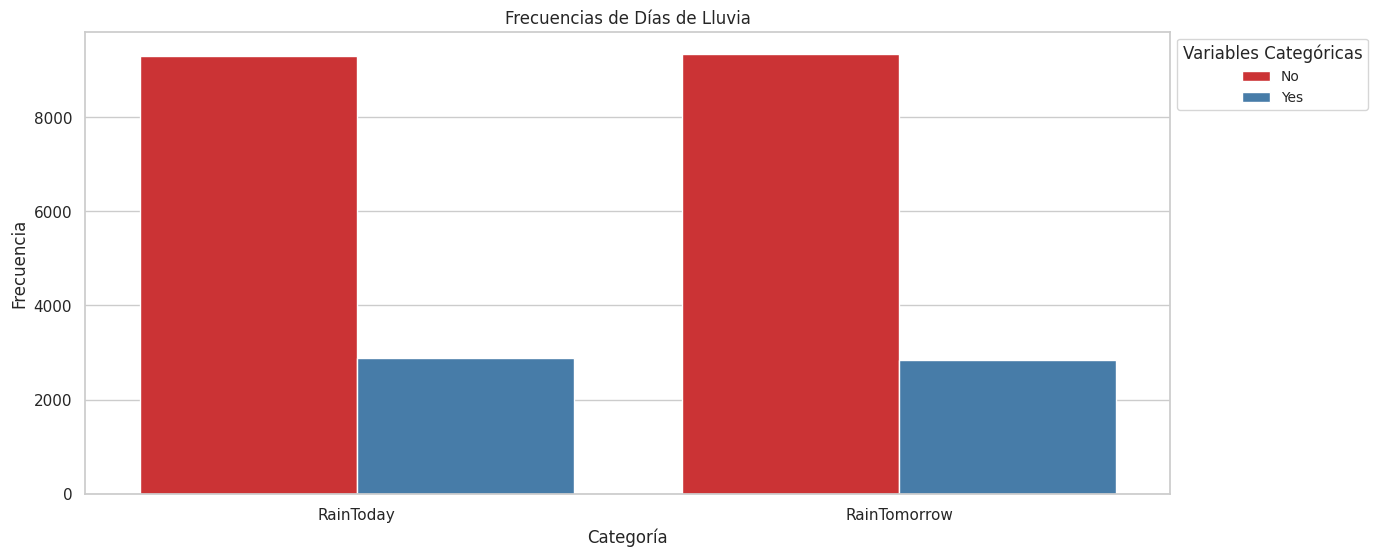

In [ ]:
categorias =  ['RainToday', 'RainTomorrow']

plt.figure(figsize=(14, 6))
sns.set(style="whitegrid")
sns.countplot(data=df_train.melt(value_vars=categorias), x='variable', hue='value', palette='Set1', order=categorias)
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.title('Frecuencias de Días de Lluvia')


plt.legend(title='Variables Categóricas', loc='upper left', fontsize='small')


plt.legend(title='Variables Categóricas', loc='upper left', fontsize='small', bbox_to_anchor=(1, 1), ncol=1)

plt.show()

Se ve claramente que el dataset no está balanceado en positivos y negativos

In [ ]:
def yn2bin(df):
    df.RainToday = df.RainToday.replace({'No': 0, 'Yes': 1})
    df.RainTomorrow = df.RainTomorrow.replace({'No': 0, 'Yes': 1})
    return df

df_train = yn2bin(df_train)

Pipelines

In [ ]:
rain_codification = Pipeline([
    ('yn2bin', FunctionTransformer(yn2bin))
])

In [ ]:
categorical_features.steps.append(('rain_codification', rain_codification))

**Dataframe después de codificaciones**

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12811 entries, 0 to 12810
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MinTemp           12409 non-null  float64
 1   MaxTemp           12413 non-null  float64
 2   Rainfall          12180 non-null  float64
 3   Evaporation       11430 non-null  float64
 4   Sunshine          11240 non-null  float64
 5   Humidity9am       12349 non-null  float64
 6   Humidity3pm       12380 non-null  float64
 7   Pressure9am       12213 non-null  float64
 8   Pressure3pm       12222 non-null  float64
 9   Cloud9am          10674 non-null  float64
 10  Cloud3pm          10476 non-null  float64
 11  Temp9am           12398 non-null  float64
 12  Temp3pm           12404 non-null  float64
 13  RainToday         12180 non-null  float64
 14  RainTomorrow      12177 non-null  float64
 15  RainfallTomorrow  12177 non-null  float64
 16  DayNumber         12811 non-null  int64 

### Valores atípicos

<Figure size 2200x1500 with 0 Axes>

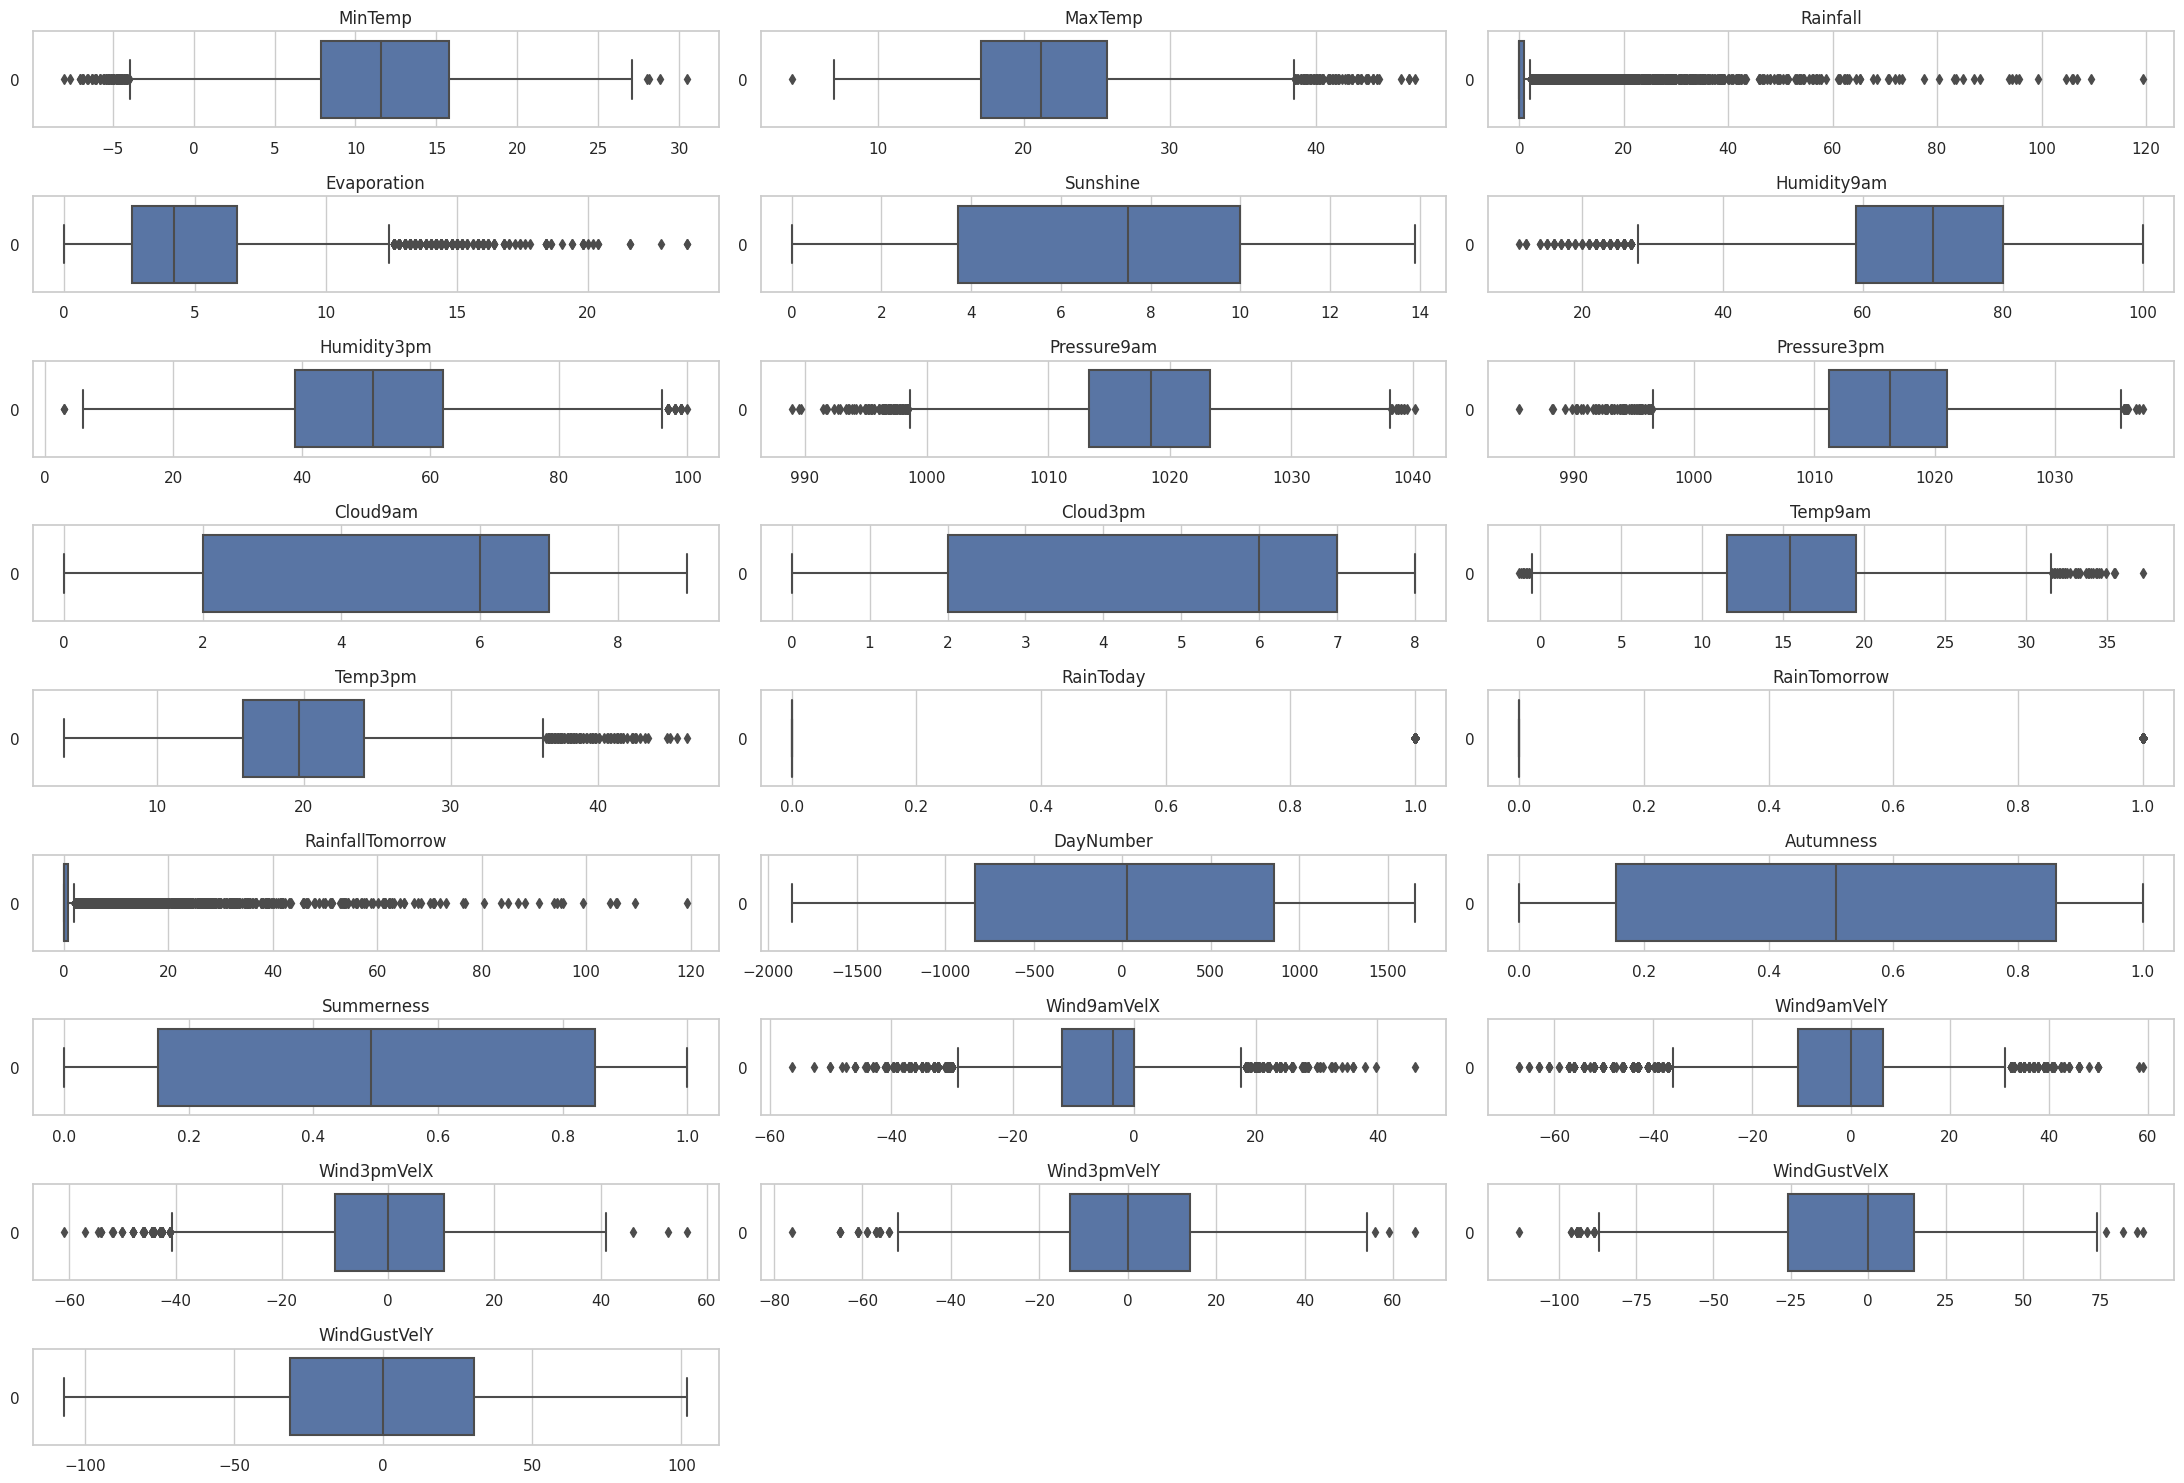

In [ ]:

plt.figure(figsize=(22, 15))

# Filtra las columnas numéricas
numerical_columns = df_train.select_dtypes(include=[pd.np.number]).columns


num_cols = 3
num_rows = len(numerical_columns) // num_cols + 1

# Crear subgráficos en un diseño de cuadrícula
fig, axes = plt.subplots(num_rows, num_cols, figsize=(22, 15))

for i, column in enumerate(numerical_columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    sns.boxplot(data=df_train[column], ax=ax, orient='h')  # Establece orientación horizontal
    ax.set_title(column)

# Eliminar subgráficos vacíos si el número de columnas no es múltiplo de 3
for i in range(len(numerical_columns), num_rows * num_cols):
    fig.delaxes(axes[i // num_cols, i % num_cols])

# Ajustar el diseño
plt.tight_layout()
plt.show()

**Observación**:
En los gráficos de caja y bigotes de las diferentes features podemos observar que en las variables 'Rainfall' y 'RainfallTomorrow' se observa la mayor cantidad de valores atípicos con respecto a las demás, y ambas están sesgadas a la derecha.

### Selección de características




In [ ]:
def feature_selection(df):
    return df.drop(columns=['RainToday'])

df_train = feature_selection(df_train)

In [ ]:
preprocesamiento.steps.append(("feature_selection", FunctionTransformer(feature_selection)))

#### Correlaciones

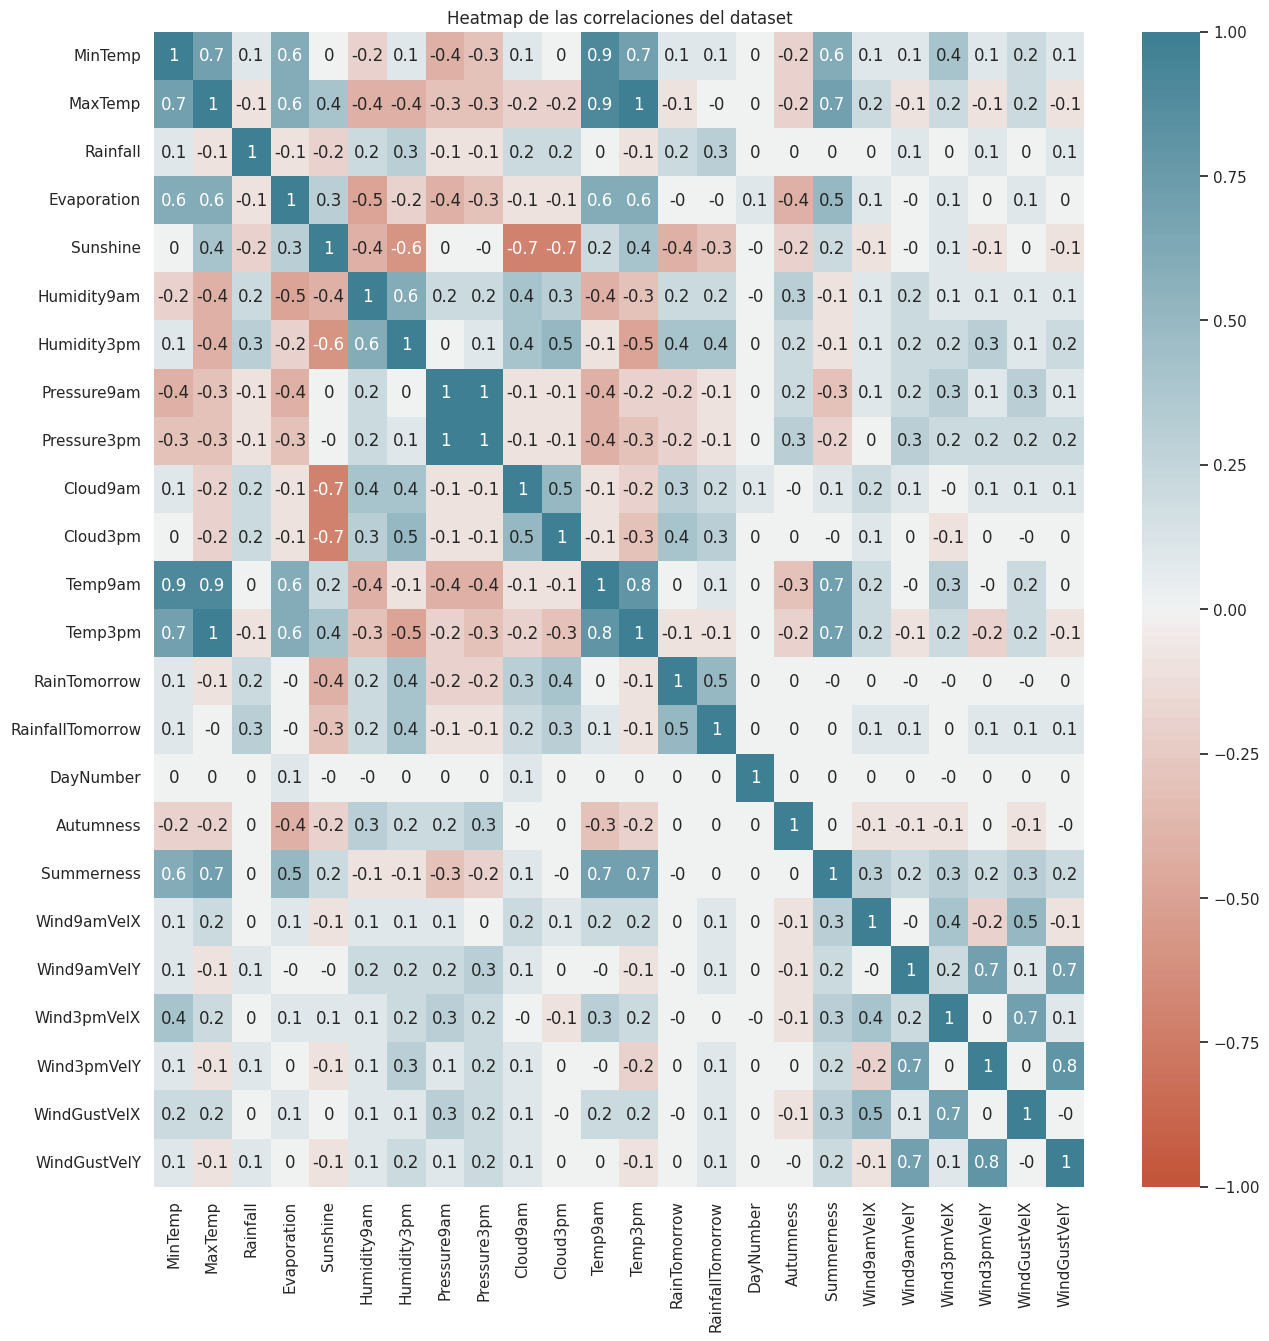

In [ ]:
# Buscar correlación entre las variables:
plt.figure(figsize=(15,15))
df_corr = df_train.corr()
# Redondear los valores de la matriz de correlación
df_corr_rounded = df_corr.round(1)
ax = sns.heatmap(
    df_corr_rounded,
    vmin=-1,vmax=1,center=0,
    cmap=sns.diverging_palette(20,220,n=200),
    annot=True
)
plt.title('Heatmap de las correlaciones del dataset')
plt.show()

Podemos observar una fuerte correlación  entre las variables 'Min Temp' y 'Temp9am'.
También entre 'MaxTemp' y 'Temp3pm'.

'Pressure9am' y 'Pressure3pm' tienen una fuerte correlación también.
Hay correlación entre las variables de temperaturas.
La variable 'WindGustVelY' esta relacionada con 'Win3pmVelY' y con 'Win9amVelY'.
Estas son las correlaciones más fuertes que modemos observar en la matriz.


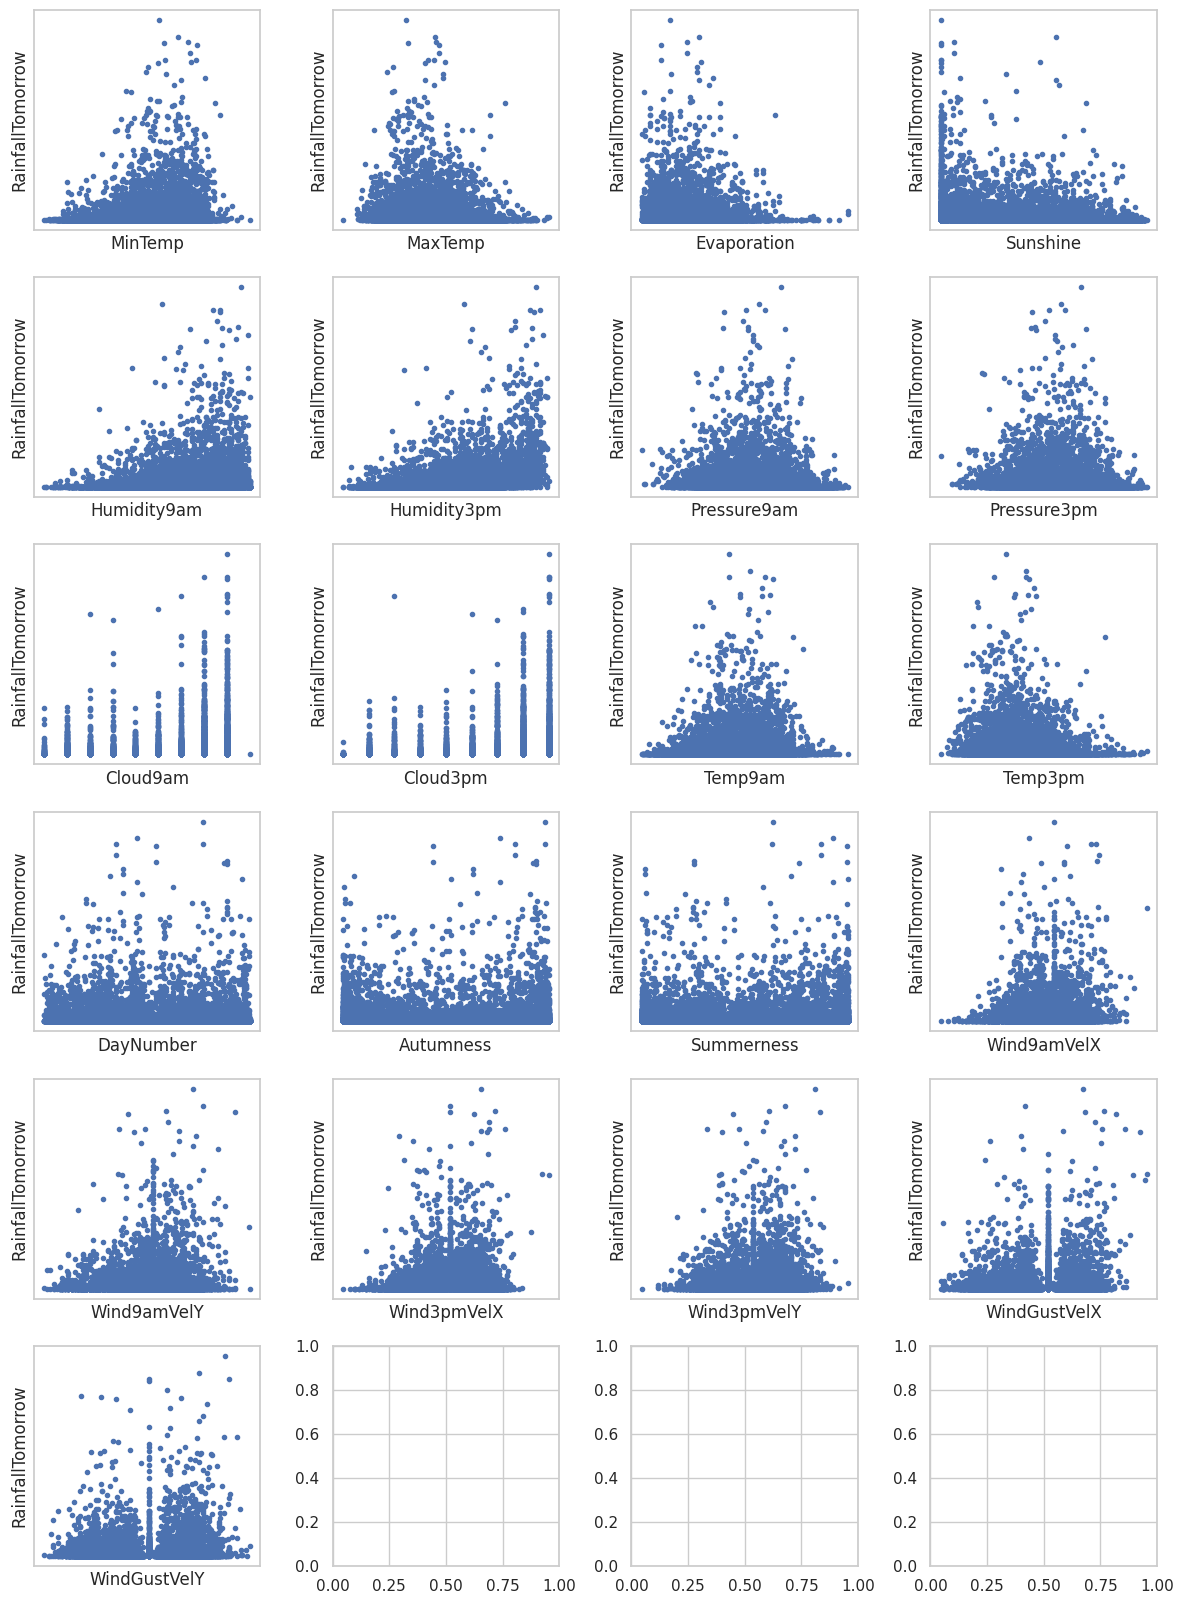

In [ ]:
cols2graph = df_train.drop(columns=["Rainfall", "RainfallTomorrow", "RainTomorrow"]).columns

nplots = len(cols2graph)
ncols = 4
nrows = math.ceil(nplots/ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 2.7*nrows))
axes = axes.flatten()

# Create scatterplots or other plots on custom axes
for i in range(nplots):
    col2graph = cols2graph[i]
    axes[i].plot(df_train[col2graph], 'RainfallTomorrow', 'o', data=df_train, markersize = 3)

    # Set the x-axis and y-axis labels for each subplot
    axes[i].set_xlabel(col2graph)
    axes[i].set_ylabel('RainfallTomorrow')
    axes[i].set_xticks([])
    axes[i].set_yticks([])

# Adjust subplot layout
plt.tight_layout()
# Show the plot
plt.show()

### Valores faltantes

In [ ]:
def drop_nan_targets(df):
    df = df.dropna(subset=['RainfallTomorrow'])
    df.reset_index(drop=True)
    return df

df_train = drop_nan_targets(df_train)

In [ ]:
df_train.isna().sum()

MinTemp                9
MaxTemp                6
Rainfall             128
Evaporation         1369
Sunshine            1562
Humidity9am           68
Humidity3pm           39
Pressure9am          204
Pressure3pm          196
Cloud9am            1623
Cloud3pm            1810
Temp9am               20
Temp3pm               15
RainTomorrow           0
RainfallTomorrow       0
DayNumber              0
Autumness              0
Summerness             0
Wind9amVelX          538
Wind9amVelY          538
Wind3pmVelX          232
Wind3pmVelY          232
WindGustVelX        1134
WindGustVelY        1134
dtype: int64

In [ ]:
df_train

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  Humidity9am  \
0          8.0     24.3       0.0          3.4       6.3         68.0   
1         14.0     26.9       3.6          4.4       9.7         80.0   
2         13.7     23.4       3.6          5.8       3.3         82.0   
3          7.6     16.1       2.8          5.6      10.6         68.0   
4          6.2     16.9       0.0          5.8       8.2         70.0   
...        ...      ...       ...          ...       ...          ...   
12806      0.1     14.4       0.0          NaN       NaN         68.0   
12807      8.3     12.3       1.4          1.8       5.6         75.0   
12808      5.7     12.6       1.2          1.8       5.6         80.0   
12809     10.1     19.3       0.0          1.4       9.3         56.0   
12810      9.4     19.9       0.0          1.4       9.3         61.0   

       Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  ...  RainfallTomorrow  \
0             29.0       1019.7       1015.0       7.0  ...               3.6   
1             36.0       1012.4       1008.4       5.0  ...               3.6   
2             69.0       1009.5       1007.2       8.0  ...              39.8   
3             49.0       1018.3       1018.5       7.0  ...               0.0   
4             57.0       1023.8       1021.7       7.0  ...               0.2   
...            ...          ...          ...       ...  ...               ...   
12806         45.0       1017.5       1016.2       NaN  ...               0.0   
12807         63.0       1018.7       1017.4       2.0  ...               0.0   
12808         50.0       1018.9       1017.5       2.0  ...               0.0   
12809         35.0       1017.3       1015.1       5.0  ...               0.0   
12810         41.0       1017.3       1015.2       5.0  ...               0.0   

       DayNumber     Autumness  Summerness   Wind9amVelX   Wind9amVelY  \
0          -1868  1.146554e-03    0.466159 -4.242641e+00  4.242641e+00   
1          -1867  6.382380e-04    0.474745  4.000000e+00  0.000000e+00   
2          -1866  2.776915e-04    0.483338 -1.102182e-15 -6.000000e+00   
3          -1864  2.889877e-07    0.500538  7.653669e+00  1.847759e+01   
4          -1863  8.351511e-05    0.509138  1.414214e+01  1.414214e+01   
...          ...           ...         ...           ...           ...   
12806       1655  8.346452e-01    0.128500 -3.673940e-15 -2.000000e+01   
12807       1655  8.346452e-01    0.128500 -1.016267e+01 -4.209518e+00   
12808       1655  8.346452e-01    0.128500 -1.700000e+01  2.081900e-15   
12809       1655  8.346452e-01    0.128500 -1.700000e+01  2.081900e-15   
12810       1655  8.346452e-01    0.128500 -2.032535e+01 -8.419036e+00   

        Wind3pmVelX   Wind3pmVelY  WindGustVelX  WindGustVelY  
0     -1.414214e+01 -1.414214e+01    -21.213203 -2.121320e+01  
1     -1.700000e+01  2.081900e-15     36.031302 -1.492465e+01  
2      2.296101e+00 -5.543277e+00    -60.104076 -6.010408e+01  
3      2.586863e+01  1.071514e+01     19.134172  4.619398e+01  
4      2.400000e+01  0.000000e+00     31.112698  3.111270e+01  
...             ...           ...           ...           ...  
12806 -1.979899e+01 -1.979899e+01    -33.941125 -3.394113e+01  
12807  1.224647e-16  2.000000e+00    -21.213203  2.121320e+01  
12808 -7.000000e+00  8.572528e-16    -23.334524  2.333452e+01  
12809 -1.900000e+01  2.326829e-15    -43.000000  5.265981e-15  
12810 -2.800000e+01  3.429011e-15    -30.405592  3.040559e+01  

[12177 rows x 24 columns]

In [ ]:
# Linear interpolation to fill missing values como todos los datos son a lo largo de tiempo
#df.interpolate(method='time', inplace=True)

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [ ]:
# Custom transformer for imputation that returns a DataFrame
class DataFrameImputer(BaseEstimator, TransformerMixin):
    def __init__(self, strategy='mean'):
        self.strategy = strategy

    def fit(self, X, y=None):
        self.imputer = SimpleImputer(strategy=self.strategy)
        self.imputer.fit(X)
        return self

    def transform(self, X):
        transformed_array = self.imputer.transform(X)
        return pd.DataFrame(transformed_array, columns=X.columns)

In [ ]:
fill_nans = DataFrameImputer(strategy='mean')
df_train = fill_nans.fit_transform(df_train)

In [ ]:
df_train

MinTemp  MaxTemp  Rainfall  Evaporation   Sunshine  Humidity9am  \
0          8.0     24.3       0.0     3.400000   6.300000         68.0   
1         14.0     26.9       3.6     4.400000   9.700000         80.0   
2         13.7     23.4       3.6     5.800000   3.300000         82.0   
3          7.6     16.1       2.8     5.600000  10.600000         68.0   
4          6.2     16.9       0.0     5.800000   8.200000         70.0   
...        ...      ...       ...          ...        ...          ...   
12172      0.1     14.4       0.0     4.862454   6.899878         68.0   
12173      8.3     12.3       1.4     1.800000   5.600000         75.0   
12174      5.7     12.6       1.2     1.800000   5.600000         80.0   
12175     10.1     19.3       0.0     1.400000   9.300000         56.0   
12176      9.4     19.9       0.0     1.400000   9.300000         61.0   

       Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  ...  RainfallTomorrow  \
0             29.0       1019.7       1015.0  7.000000  ...               3.6   
1             36.0       1012.4       1008.4  5.000000  ...               3.6   
2             69.0       1009.5       1007.2  8.000000  ...              39.8   
3             49.0       1018.3       1018.5  7.000000  ...               0.0   
4             57.0       1023.8       1021.7  7.000000  ...               0.2   
...            ...          ...          ...       ...  ...               ...   
12172         45.0       1017.5       1016.2  4.741899  ...               0.0   
12173         63.0       1018.7       1017.4  2.000000  ...               0.0   
12174         50.0       1018.9       1017.5  2.000000  ...               0.0   
12175         35.0       1017.3       1015.1  5.000000  ...               0.0   
12176         41.0       1017.3       1015.2  5.000000  ...               0.0   

       DayNumber     Autumness  Summerness   Wind9amVelX   Wind9amVelY  \
0        -1868.0  1.146554e-03    0.466159 -4.242641e+00  4.242641e+00   
1        -1867.0  6.382380e-04    0.474745  4.000000e+00  0.000000e+00   
2        -1866.0  2.776915e-04    0.483338 -1.102182e-15 -6.000000e+00   
3        -1864.0  2.889877e-07    0.500538  7.653669e+00  1.847759e+01   
4        -1863.0  8.351511e-05    0.509138  1.414214e+01  1.414214e+01   
...          ...           ...         ...           ...           ...   
12172     1655.0  8.346452e-01    0.128500 -3.673940e-15 -2.000000e+01   
12173     1655.0  8.346452e-01    0.128500 -1.016267e+01 -4.209518e+00   
12174     1655.0  8.346452e-01    0.128500 -1.700000e+01  2.081900e-15   
12175     1655.0  8.346452e-01    0.128500 -1.700000e+01  2.081900e-15   
12176     1655.0  8.346452e-01    0.128500 -2.032535e+01 -8.419036e+00   

        Wind3pmVelX   Wind3pmVelY  WindGustVelX  WindGustVelY  
0     -1.414214e+01 -1.414214e+01    -21.213203 -2.121320e+01  
1     -1.700000e+01  2.081900e-15     36.031302 -1.492465e+01  
2      2.296101e+00 -5.543277e+00    -60.104076 -6.010408e+01  
3      2.586863e+01  1.071514e+01     19.134172  4.619398e+01  
4      2.400000e+01  0.000000e+00     31.112698  3.111270e+01  
...             ...           ...           ...           ...  
12172 -1.979899e+01 -1.979899e+01    -33.941125 -3.394113e+01  
12173  1.224647e-16  2.000000e+00    -21.213203  2.121320e+01  
12174 -7.000000e+00  8.572528e-16    -23.334524  2.333452e+01  
12175 -1.900000e+01  2.326829e-15    -43.000000  5.265981e-15  
12176 -2.800000e+01  3.429011e-15    -30.405592  3.040559e+01  

[12177 rows x 24 columns]

In [ ]:
df_train.isna().sum()

MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainTomorrow        0
RainfallTomorrow    0
DayNumber           0
Autumness           0
Summerness          0
Wind9amVelX         0
Wind9amVelY         0
Wind3pmVelX         0
Wind3pmVelY         0
WindGustVelX        0
WindGustVelY        0
dtype: int64

Agregamos el imputer al pipeline

In [ ]:
imputer = Pipeline([
    ('drop_nan_targets', FunctionTransformer(drop_nan_targets)),
    ('fill_nans', fill_nans)
])

In [ ]:
preprocesamiento.steps.append(('imputer', imputer))

### Escalado de Características: Estandarización

In [ ]:
def x_ys_splitter(df):
    # Column names for the transformations
    target_columns = ['RainfallTomorrow', 'RainTomorrow']
    columns_to_scale = df.drop(columns=target_columns).columns
    df_x = df.drop(columns=target_columns)
    df_y_reg, df_y_class = df[target_columns[0]], df[target_columns[1]]
    return df_x, df_y_reg, df_y_class

df_x_train, df_y_reg_train, df_y_class_train = x_ys_splitter(df_train)

In [ ]:
splitter = Pipeline([
    ('x_ys_splitter', FunctionTransformer(x_ys_splitter))
])

In [ ]:
preprocesamiento.steps.append(('splitter', splitter))

In [ ]:
class StandardScalerFor3Tuple:
    def __init__(self):
        self.mean_ = None
        self.scale_ = None

    def fit(self, X):
        self.mean_ = np.mean(X, axis=0)
        self.scale_ = np.std(X, axis=0)
        return self

    def transform(self, X, y1=None, y2=None):
        if y1 is None:
            y1 = X[1]
            y2 = X[2]
            X = X[0]

        if self.mean_ is None or self.scale_ is None:
            raise ValueError("Scaler has not been fitted yet.")
        scaled_X = (X - self.mean_) / self.scale_
        return scaled_X.values, y1.values, y2.values

    def fit_transform(self, X, y1=None, y2=None):
        if y1 is None:
            y1 = X[1]
            y2 = X[2]
            X = X[0]

        return self.fit(X).transform(X, y1, y2)

In [ ]:
extracting_and_scaling = StandardScalerFor3Tuple()
x_train, y_reg_train, y_class_train = extracting_and_scaling.fit_transform(df_x_train, df_y_reg_train, df_y_class_train)

In [ ]:
preprocesamiento.steps.append(('extracting_and_scaling', extracting_and_scaling))

In [ ]:
x_train_copy, y_reg_train_copy, y_class_train_copy = preprocesamiento.fit_transform(df_train_copy)

In [ ]:
print(np.all(x_train == x_train_copy))
print(np.all(y_reg_train == y_reg_train_copy))
print(np.all(y_class_train == y_class_train_copy))

True
True
True


## Transformación de los datos de test con el pipeline

In [ ]:
x_test, y_reg_test, y_class_test = preprocesamiento.transform(df_test)

In [ ]:
print(x_test)
print(y_reg_test)
print(y_class_test)

[[ 0.29430837 -1.03169434  5.09166721 ...  0.00697603 -1.19795915
  -1.02754215]
 [-0.52508169  0.91550591 -0.28676533 ... -0.58480023  1.71201874
   0.06888863]
 [-0.25195167  1.55907209 -0.31392913 ...  0.00697603 -0.86014184
  -0.76358659]
 ...
 [-0.04710415 -0.28911798  0.28367449 ...  0.4708918  -0.75020967
   0.06888863]
 [-2.04436743 -1.2957215  -0.31392913 ... -1.12704029 -0.75619806
  -0.6823695 ]
 [-1.5663899  -1.44423677 -0.31392913 ... -1.05309479  0.20528195
  -1.05097996]]
[2.8 0.  0.  ... 0.  0.4 0. ]
[1. 0. 0. ... 0. 0. 0.]


##Modelos base

### Regresión

Predicción de la media

In [ ]:
# Calcular la media de y_reg_train como predicciones
y_predict = np.mean(y_reg_train)            #media

# Calcular el MAE
mae = mean_absolute_error(y_reg_test, [y_predict] * len(y_reg_test))
print(mae)

3.517297927486625


MAE prediciendo con la media = 3,52

###Clasificación

In [ ]:
def f1_avg(y_true, y_pred):
    from sklearn.metrics import f1_score
    return f1_score(y_true, y_pred, average='macro')

Bosques aleatorios

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Crea y entrena un modelo de bosque aleatorio
rng_forest = RandomForestClassifier(random_state=42)
rng_forest.fit(x_train, y_class_train)

# Hace predicciones en el conjunto de prueba
y_pred = rng_forest.predict(x_test)

# Calcula la métrica F1 para el modelo de bosque aleatorio
f1_rf = f1_avg(y_class_test, y_pred)

print(f1_rf)

0.7809282234382706


Después de probar con varios modelos, decidimos quedarnos con el de  RandomForest, ya que era el modelo que obtenía los mejores resultados, con un F1 = 0,78.

## Regresión Lineal

In [ ]:
"""
shapes:
    x_train = nxm
    y_reg_train = nx1
    x_test = pxm
    y_reg_test = px1
    W = mx1
"""
n = x_train.shape[0]
m = x_train.shape[1]
p = x_test.shape[0]

### LinearRegression

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_reg_train);

#### Valores Predichos vs Verdaderos

In [ ]:
y_pred = lin_reg.predict(x_test)

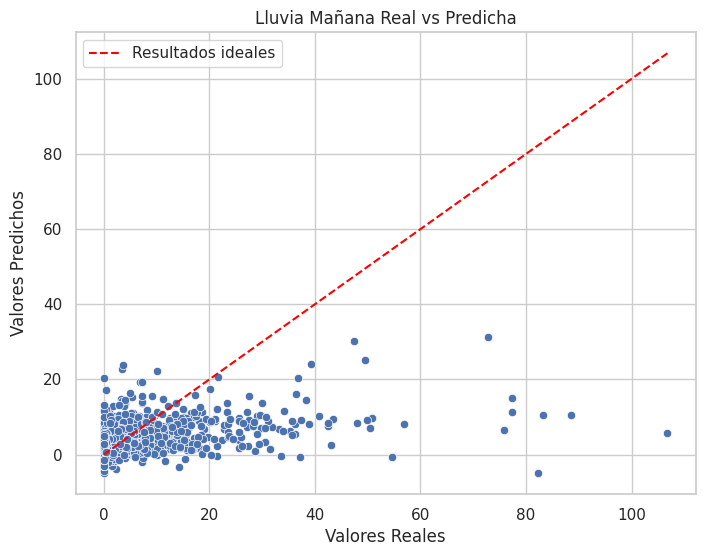

In [ ]:
# Create a scatter plot to compare the actual vs. predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_reg_test, y=y_pred)
plt.title("Lluvia Mañana Real vs Predicha")
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")

# Plot a 45-degree diagonal line
plt.plot([min(y_reg_test), max(y_reg_test)], [min(y_reg_test), max(y_reg_test)], color='red', linestyle='--', label='Resultados ideales')
plt.legend()

plt.show()

Los puntos no parecen estar bastante lejos de la línea en 45°, por lo tanto parecería haber underfitting.

#### Métricas

In [ ]:
mae = mean_absolute_error(y_reg_train, lin_reg.predict(x_train))
print(mae)

3.1477598110500455


MAE del modelo de LinearRegression sobre el training set = 3,15

In [ ]:
mae = mean_absolute_error(y_reg_test, y_pred)
print(mae)

3.184477626031427


MAE del modelo de LinearRegression sobre el test set = 3,18

### Gradiente Descendiente

In [ ]:
class GradientDescent:
    def __init__(self, epochs = 1000, learning_rate = 0.01):
        self.epochs = epochs
        self.learning_rate = learning_rate

    def descend(self, x_train, x_test, y_reg_train, y_reg_test, epochs = None, learning_rate = None):
        if epochs is None:
            epochs = self.epochs
        if learning_rate is None:
            learning_rate = self.learning_rate
        # Dimensiones
        n = x_train.shape[0]
        m = x_train.shape[1]
        p = x_test.shape[0]
        # Poner columna de unos a las matrices X
        self.x_train_1s = np.hstack((np.ones((n, 1)), x_train))
        self.x_test_1s = np.hstack((np.ones((p, 1)), x_test))
        # Inicializar pesos aleatorios
        self.W = np.random.randn(m+1).reshape(m+1, 1)
        self.train_errors = []  # Para almacenar el error de entrenamiento en cada época
        self.test_errors = []   # Para almacenar el error de prueba en cada época

        for i in range(epochs):
            #Test set error
            self.y_pred_test = np.matmul(self.x_test_1s, self.W)
            error_test = y_reg_test.reshape(-1,1) - self.y_pred_test
            self.test_mse = np.mean(error_test ** 2)
            self.test_errors.append(self.test_mse)

            #Training set error
            self.y_pred_train = np.matmul(self.x_train_1s, self.W)
            error_train = y_reg_train.reshape(-1,1) - self.y_pred_train
            self.train_mse = np.mean(error_train ** 2)
            self.train_errors.append(self.train_mse)

            # Gradiente
            grad_sum = np.sum(error_train * self.x_train_1s, axis=0)
            grad_mul = -2/n * grad_sum  # 1xm
            gradient = np.transpose(grad_mul).reshape(-1, 1)  # mx1
            # Actualizar pesos
            self.W = self.W - (learning_rate * gradient)

    def predict(self, x):
        n = x.shape[0]
        x_1s = np.hstack((np.ones((n, 1)), x))
        return np.matmul(self.x_1s, self.W)

In [ ]:
grad_desc = GradientDescent()
grad_desc.descend(x_train, x_test, y_reg_train, y_reg_test)
y_pred = grad_desc.y_pred_test

#### Errores por épocas

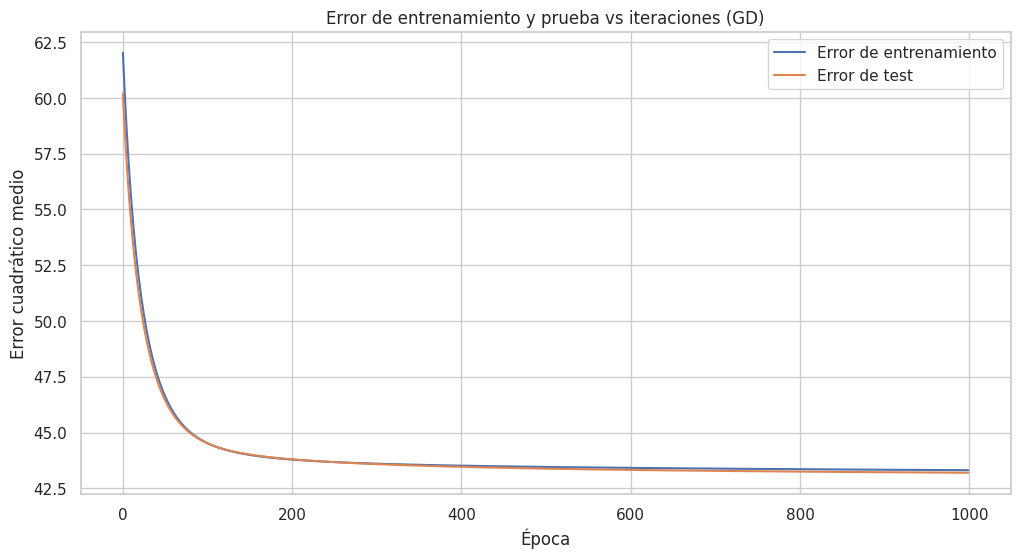

In [ ]:
# Graficar errores de entrenamiento y prueba

plt.figure(figsize=(12, 6))
# Plotear errores de entrenamiento
plt.plot(grad_desc.train_errors, label='Error de entrenamiento')
# Plotear errores de prueba
plt.plot(grad_desc.test_errors, label='Error de test')
# Poner labels en los ejes
plt.xlabel('Época')
plt.ylabel('Error cuadrático medio')

plt.legend()
# titulo
plt.title('Error de entrenamiento y prueba vs iteraciones (GD)')
# Terminar y mostrar gráfico
plt.show()

#### Métricas

In [ ]:
mae = mean_absolute_error(y_reg_test, y_pred)
print(mae)

3.1901840135500676


MAE del modelo de GradientDescent sobre el test set = 3,17

### Regularizaciones

#### Lasso

In [ ]:
# Creación del modelo Lasso con validación cruzada para encontrar el valor óptimo de alpha
lasso = LassoCV(alphas=np.logspace(-10, 10, 200), cv=10)
lasso.fit(x_train, y_reg_train)

# Predicciones con el modelo Lasso
y_pred = lasso.predict(x_test)

In [ ]:
print("Mejor Alfa:", lasso.alpha_)

Mejor Alfa: 0.0027364399970746718


##### Parámetros regularizados

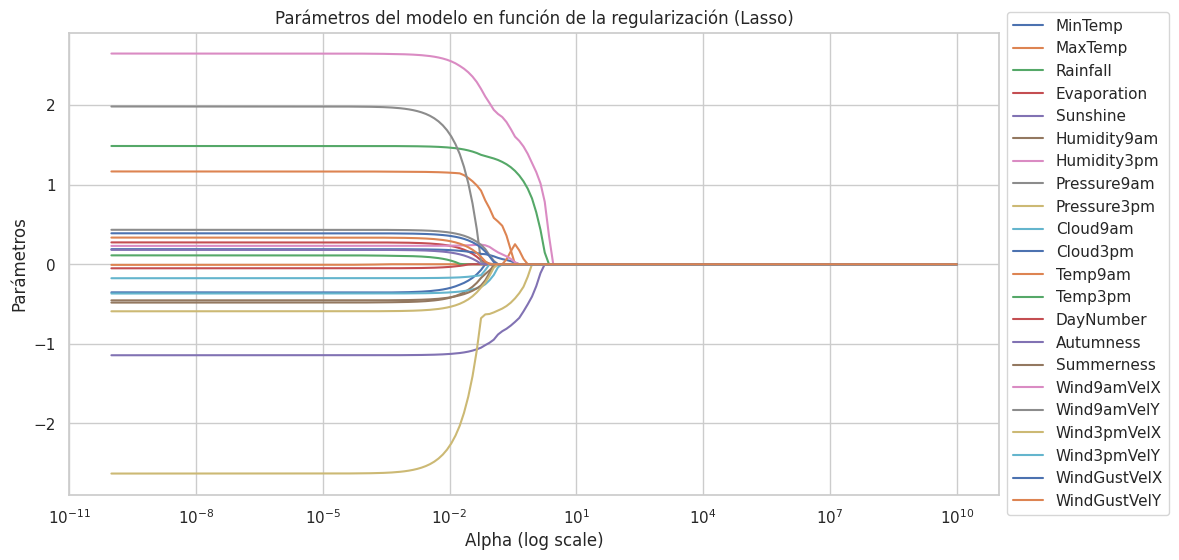

In [ ]:

x_df = pd.DataFrame(x_train)

# Asignar nombres a las columnas
x_df.columns = ['MinTemp', 'MaxTemp', 'Rainfall' ,'Evaporation' ,'Sunshine', 'Humidity9am',
                    'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm','Temp9am', 'Temp3pm',
                    'DayNumber','Autumness', 'Summerness', 'Wind9amVelX', 'Wind9amVelY', 'Wind3pmVelX', 'Wind3pmVelY',
                    'WindGustVelX', 'WindGustVelY']

# Definir una serie de valores de alpha
alphas = np.logspace(-10, 10, 200)

# Inicializar una lista para almacenar los coeficientes del modelo
coefs = []

# Ajustar el modelo Lasso para diferentes valores de alpha y registrar los coeficientes
for alpha in alphas:
    model = Lasso(alpha=alpha)
    model.fit(x_train, y_reg_train)
    coefs.append(model.coef_)

# Convertir la lista de coeficientes en un arreglo numpy
coefs = np.array(coefs)

column_names = x_df.columns

# Graficar la evolución de los coeficientes en función de alpha con nombres de columna
plt.figure(figsize=(12, 6))
for i in range(coefs.shape[1]):
    plt.plot(alphas, coefs[:, i], label=column_names[i])

plt.xscale('log')
plt.title('Parámetros del modelo en función de la regularización (Lasso)')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Parámetros')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Colocar la leyenda fuera del gráfico
plt.axis('tight')
plt.show()

##### Métricas

In [ ]:
mae = mean_absolute_error(y_reg_test, y_pred)
print(mae)

3.1795577377954145


MAE del modelo con Lasso y sobre el test set = 3,18

#### Ridge

In [ ]:
# Creación del modelo Ridge con validación cruzada para encontrar el valor óptimo de alpha
ridge = RidgeCV(alphas=np.logspace(-10, 10, 200), cv=10)
ridge.fit(x_train, y_reg_train)

# Predicciones con el modelo Ridge
y_pred = ridge.predict(x_test)

In [ ]:
print("Mejor Alfa:", ridge.alpha_)

Mejor Alfa: 91.15888299750837


##### Parámetros regularizados

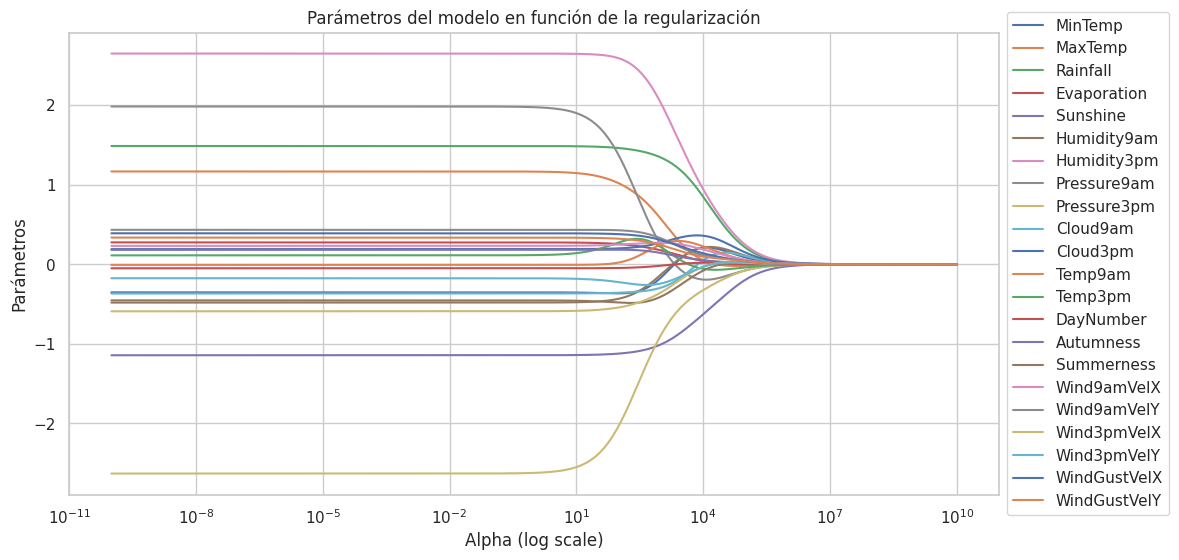

In [ ]:

x_df = pd.DataFrame(x_train)

# Asignar nombres a las columnas
x_df.columns = ['MinTemp', 'MaxTemp', 'Rainfall' ,'Evaporation' ,'Sunshine', 'Humidity9am',
                    'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 	'Cloud3pm','Temp9am', 'Temp3pm',
                    'DayNumber','Autumness', 'Summerness', 'Wind9amVelX', 'Wind9amVelY', 'Wind3pmVelX', 'Wind3pmVelY',
                    'WindGustVelX', 'WindGustVelY']

# Definir una serie de valores de alpha
alphas = np.logspace(-10, 10, 200)

# Inicializar una lista para almacenar los coeficientes del modelo
coefs = []

# Ajustar el modelo Ridge para diferentes valores de alpha y registrar los coeficientes
for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(x_train, y_reg_train)
    coefs.append(model.coef_)

# Convertir la lista de coeficientes en un arreglo numpy
coefs = np.array(coefs)


column_names = x_df.columns

# Graficar la evolución de los coeficientes en función de alpha con nombres de columna
plt.figure(figsize=(12, 6))
for i in range(coefs.shape[1]):
    plt.plot(alphas, coefs[:, i], label=column_names[i])

plt.xscale('log')
plt.title('Parámetros del modelo en función de la regularización')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Parámetros')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Colocar la leyenda fuera del gráfico
plt.axis('tight')
plt.show()

##### Métricas

In [ ]:
mae = mean_absolute_error(y_reg_test, y_pred)
print(mae)

3.17100212899497


MAE del modelo con Ridge y sobre el test set = 3,17

#### Elasticnet

In [ ]:
elastic_net = ElasticNetCV(l1_ratio = [0.01, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99], alphas = np.insert(np.logspace(-1, 1, 200), 0, 0), cv = 10)
elastic_net.fit(x_train, y_reg_train)
y_pred = elastic_net.predict(x_test);

In [ ]:
print("Mejor L1 Ratio:", elastic_net.l1_ratio_)
print("Mejor Alfa:", elastic_net.alpha_)

Mejor L1 Ratio: 0.1
Mejor Alfa: 0.0


##### Métricas

In [ ]:
mae = mean_absolute_error(y_reg_test, y_pred)
print(mae)

3.184477626031427


MAE del modelo con ElasticNet y sobre el test set = 3,18

Da igual cualquier tipo de regularización porque los CV eligen darles un peso (alfa) lo más cercano a 0 posible. Así que parece no parece haber ningún tipo de overfitting que esté intentando reducir.

## Regresión Logística

### LogisticRegression

In [ ]:
# Inicializar y entrenar un modelo de regresión logística
log_reg = LogisticRegression(random_state=42)
log_reg.fit(x_train, y_class_train)

# Realizar predicciones en el conjunto de prueba
y_pred = log_reg.predict(x_test)

####Curva ROC

In [ ]:
# Obtengo las probabilidades de predicción del modelo
y_probs = log_reg.predict_proba(x_test)[:, 1]

# Calculo la ROC y el AUC
fpr, tpr, thresholds = roc_curve(y_class_test, y_probs)
roc_auc = auc(fpr, tpr)

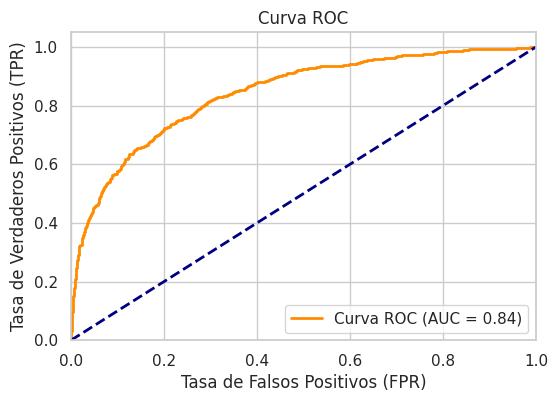

In [ ]:
# Grafico la curva ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

#### Métricas

Elegimos la métrica 'f1-score' para comparar el modelo antes y después de balancearlo porque  es una métrica que tiene en cuenta tanto la precisión como el recall, lo que la hace adecuada para problemas donde hay  desequilibrio de clases como es en este caso, donde la clase que queremos predecir es la  "clase minoritaria". Nos pareció una buena decisión calcular el promedio de ambos F1, es decir, calcular un promedio de las dos clases y utilizar esto como métrica para nuestro modelo.


In [ ]:
print(classification_report(y_class_test, y_pred))
print(confusion_matrix(y_class_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.95      0.89      2299
         1.0       0.73      0.46      0.56       723

    accuracy                           0.83      3022
   macro avg       0.79      0.70      0.73      3022
weighted avg       0.82      0.83      0.82      3022

[[2174  125]
 [ 390  333]]


In [ ]:
print(f1_avg(y_class_test, y_pred))

0.7290135835351805


F1s = 0.89, 0.56

F1 promedio del modelo de LogisticRegression sobre el test set = 0,73

### Balanceo del dataset

#### Adentro de LogisticRegression

In [ ]:
bal_log_reg = LogisticRegression(random_state=42, class_weight='balanced')
bal_log_reg.fit(x_train, y_class_train)
y_pred = bal_log_reg.predict(x_test)

print(classification_report(y_class_test, y_pred))
print(confusion_matrix(y_class_test, y_pred), '\n')
print(f1_avg(y_class_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.79      0.84      2299
         1.0       0.52      0.73      0.61       723

    accuracy                           0.77      3022
   macro avg       0.71      0.76      0.72      3022
weighted avg       0.81      0.77      0.79      3022

[[1811  488]
 [ 195  528]] 

0.7242964070156597


F1s = 0.84, 0.61

F1 promedio del modelo balanceado por LogisticRegression sobre el test set = 0,72

Podemos observar que mejoró el f1-score de la fila 2, pero empeoró el de la fila 1 tanto que el promedio da un poquito peor.

#### Con Over Sampling

In [ ]:
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(x_train, y_class_train)

In [ ]:
len(y_resampled[y_resampled==1]), len(y_resampled[y_resampled==0])

(9344, 9344)

In [ ]:
over_log_reg = LogisticRegression(random_state=42)
over_log_reg.fit(X_resampled, y_resampled)
y_pred = over_log_reg.predict(x_test)

print(classification_report(y_class_test, y_pred))
print(confusion_matrix(y_class_test, y_pred), '\n')
print(f1_avg(y_class_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.79      0.84      2299
         1.0       0.52      0.73      0.61       723

    accuracy                           0.77      3022
   macro avg       0.71      0.76      0.72      3022
weighted avg       0.81      0.77      0.78      3022

[[1810  489]
 [ 196  527]] 

0.723489075850259


F1s = 0.84, 0.61

F1 promedio del modelo balanceado por oversampling sobre el test set = 0,72

#### Con Under Sampling

In [ ]:
undersampler = RandomUnderSampler(random_state=42)
X_resampled2, y_resampled2 = undersampler.fit_resample(x_train, y_class_train)

In [ ]:
len(y_resampled2[y_resampled2==1]), len(y_resampled2[y_resampled2==0])

(2833, 2833)

In [ ]:
# Entrenar el modelo con los datos submuestreados
under_log_reg = LogisticRegression(random_state=42)
under_log_reg.fit(X_resampled2, y_resampled2)
y_pred = under_log_reg.predict(x_test)

# Evaluar el modelo
print(classification_report(y_class_test, y_pred))
print(confusion_matrix(y_class_test, y_pred), '\n')
print(f1_avg(y_class_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.78      0.84      2299
         1.0       0.52      0.73      0.61       723

    accuracy                           0.77      3022
   macro avg       0.71      0.76      0.72      3022
weighted avg       0.81      0.77      0.78      3022

[[1804  495]
 [ 192  531]] 

0.7236253412061175


F1s = 0.84, 0.61

F1 promedio del modelo balanceado por oversampling sobre el test set = 0,72

Aunque los métodos de balanceo UnderSampling, OverSampling, y el cambio de los pesos clasificaron el conjunto de test un poco diferente si se mira la matriz de confusión, son diferencias mínimas que no hacen una diferencia en el f1-score.

## Redes Neuronales

In [ ]:
!pip install tensorflow -q

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical

In [ ]:
dict_epochs_types={
    "_250_epocas_largas":{
        "epochs": 250,
        "batch_size": 100},    #batchs: x_train: 122, x_train2: 98
    "_500_epocas_medianas":{
        "epochs": 500,
        "batch_size": 510},    #batchs: x_train: 24, x_train2: 20
    "_1000_epocas_cortas":{
        "epochs": 800,
        "batch_size": 2500}    #batchs: x_train: 5, x_train2: 4
}

###  De Clasificación

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

class ClassificationNeuralNetwork:
    def __init__(self, n_hidden_layers, n_neurons, activations, learning_rate, epochs_type=None, epochs=None, batch_size=None, metric=None):
        # Guardo los datos de los epochs para el training
        if n_hidden_layers > 2:
            print("Demasiadas capas ocultas")
            return None
        self.metric = metric
        self.epochs = epochs
        self.batch_size = batch_size
        if epochs_type is not None:
            self.epochs = dict_epochs_types[epochs_type]["epochs"]
            self.batch_size = dict_epochs_types[epochs_type]["batch_size"]

        # Inicializo el modelo
        self.model = Sequential()
        match n_hidden_layers:
            case 0:
                self.model.add(Dense(1, activation='sigmoid', input_shape=(m,)))
            case 1:
                self.model.add(Dense(n_neurons[0], activation=activations[0], input_shape=(m,)))
                self.model.add(Dense(1, activation='sigmoid'))
            case 2:
                self.model.add(Dense(n_neurons[0], activation=activations[0], input_shape=(m,)))
                self.model.add(Dense(n_neurons[1], activation=activations[1]))
                self.model.add(Dense(1, activation='sigmoid'))

        # Compilar el modelo
        custom_optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
        self.model.compile(optimizer=custom_optimizer, loss='binary_crossentropy', metrics=[metric])

    def fit(self, x_train, y_train, epochs=None, batch_size=None, validation_data=None):
        if epochs is None:
            epochs = self.epochs
        if batch_size is None:
            batch_size = self.batch_size
        history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=validation_data)
        return history

    def evaluate(self, x_test, y_test):
        return self.model.evaluate(x_test, y_test)

    def predict(self, x):
        return self.model.predict(x)

In [ ]:
class_nn = ClassificationNeuralNetwork(n_hidden_layers=2, n_neurons=[4,2], activations=['sigmoid', 'relu'], learning_rate=0.01, epochs_type='_1000_epocas_cortas')

In [ ]:
loss_history = class_nn.fit(x_train, y_class_train, validation_data=(x_test, y_class_test))

Epoch 1/800
5/5 [==============================] - 1s 39ms/step - loss: 0.6917 - val_loss: 0.6775
Epoch 2/800
5/5 [==============================] - 0s 17ms/step - loss: 0.6717 - val_loss: 0.6631
Epoch 3/800
5/5 [==============================] - 0s 20ms/step - loss: 0.6571 - val_loss: 0.6478
Epoch 4/800
5/5 [==============================] - 0s 19ms/step - loss: 0.6421 - val_loss: 0.6336
Epoch 5/800
5/5 [==============================] - 0s 19ms/step - loss: 0.6281 - val_loss: 0.6210
Epoch 6/800
5/5 [==============================] - 0s 19ms/step - loss: 0.6154 - val_loss: 0.6086
Epoch 7/800
5/5 [==============================] - 0s 8ms/step - loss: 0.6030 - val_loss: 0.5968
Epoch 8/800
5/5 [==============================] - 0s 7ms/step - loss: 0.5912 - val_loss: 0.5853
Epoch 9/800
5/5 [==============================] - 0s 7ms/step - loss: 0.5800 - val_loss: 0.5741
Epoch 10/800
5/5 [==============================] - 0s 13ms/step - loss: 0.5689 - val_loss: 0.5633
Epoch 11/800
5/5 [====

#### Errores por épocas

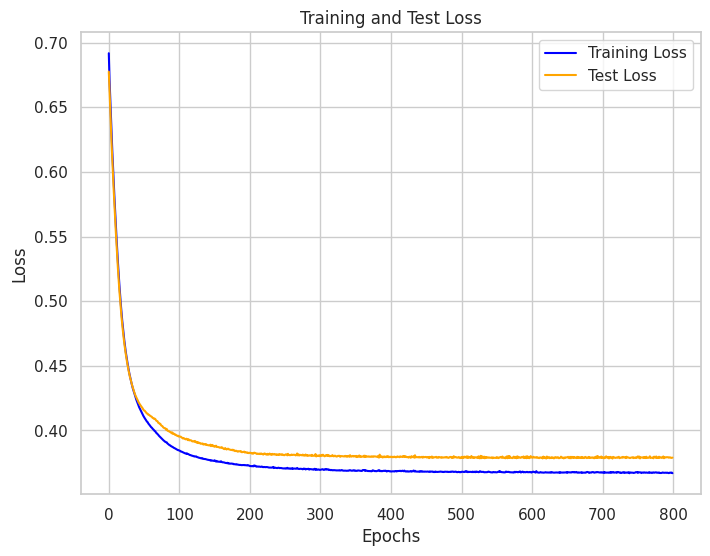

In [ ]:
# Retrieve training and validation losses from the history object
training_loss = loss_history.history['loss']
validation_loss = loss_history.history['val_loss']

# Create a plot
plt.figure(figsize=(8, 6))

# Plot training and validation losses
plt.plot(training_loss, label='Training Loss', color='blue')
plt.plot(validation_loss, label='Test Loss', color='orange')

# Set plot title and labels
plt.title('Training and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show plot
plt.show()

#### Métricas

In [ ]:
y_pred = class_nn.predict(x_test)

threshold = 0.5
y_pred = (y_pred > threshold).astype(float)

95/95 [==============================] - 0s 1ms/step


In [ ]:
print(classification_report(y_class_test, y_pred))
print(confusion_matrix(y_class_test, y_pred), '\n')
print(f1_avg(y_class_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90      2299
         1.0       0.72      0.52      0.60       723

    accuracy                           0.84      3022
   macro avg       0.79      0.73      0.75      3022
weighted avg       0.83      0.84      0.83      3022

[[2152  147]
 [ 346  377]] 

0.7509392983017487


F1s = 0.90, 0.60

F1 promedio de la red neuronal de clasificación = 0,75

Casi no hay mejora en los F1. Quizás por intentar minimizar la entropía cruzada en vez de maximizar el promedio de F1s

###  De Regresión

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

class RegressionNeuralNetwork:
    def __init__(self, n_hidden_layers, n_neurons, activations, learning_rate, epochs_type=None, epochs=None, batch_size=None, metric=None):
        # Guardo los datos de los epochs para el training
        if n_hidden_layers > 2:
            print("Demasiadas capas ocultas")
            return None

        self.epochs = epochs
        self.batch_size = batch_size
        if epochs_type is not None:
            self.epochs = dict_epochs_types[epochs_type]["epochs"]
            self.batch_size = dict_epochs_types[epochs_type]["batch_size"]

        # Inicializo el modelo
        self.model = Sequential()
        match n_hidden_layers:
            case 1:
                self.model.add(Dense(1, input_shape=(m,)))
            case 2:
                self.model.add(Dense(n_neurons[0], activation=activations[0], input_shape=(m,)))
                self.model.add(Dense(1))
            case 3:
                self.model.add(Dense(n_neurons[0], activation=activations[0], input_shape=(m,)))
                self.model.add(Dense(n_neurons[1], activation=activations[1]))
                self.model.add(Dense(1))

        # Compilar el modelo
        custom_optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
        self.model.compile(optimizer=custom_optimizer, loss='mean_absolute_error', metrics=[metric])

    def fit(self, x_train, y_train, epochs=None, batch_size=None, validation_data=None):
        if epochs is None:
            epochs = self.epochs
        if batch_size is None:
            batch_size = self.batch_size
        history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=validation_data)
        return history

    def evaluate(self, x_test, y_test):
        return self.model.evaluate(x_test, y_test)

    def predict(self, x):
        return self.model.predict(x)

In [ ]:
reg_nn = RegressionNeuralNetwork(2, [4, 2], ['sigmoid', 'sigmoid'], 0.01)

In [ ]:
loss_history = reg_nn.fit(x_train, y_reg_train, epochs=1300, batch_size=4100, validation_data=(x_test, y_reg_test))

Epoch 1/1300
3/3 [==============================] - 1s 86ms/step - loss: 3.5767 - val_loss: 3.5966
Epoch 2/1300
3/3 [==============================] - 0s 34ms/step - loss: 3.4686 - val_loss: 3.4892
Epoch 3/1300
3/3 [==============================] - 0s 30ms/step - loss: 3.3626 - val_loss: 3.3843
Epoch 4/1300
3/3 [==============================] - 0s 20ms/step - loss: 3.2591 - val_loss: 3.2817
Epoch 5/1300
3/3 [==============================] - 0s 16ms/step - loss: 3.1577 - val_loss: 3.1816
Epoch 6/1300
3/3 [==============================] - 0s 18ms/step - loss: 3.0587 - val_loss: 3.0842
Epoch 7/1300
3/3 [==============================] - 0s 17ms/step - loss: 2.9620 - val_loss: 2.9894
Epoch 8/1300
3/3 [==============================] - 0s 15ms/step - loss: 2.8681 - val_loss: 2.8981
Epoch 9/1300
3/3 [==============================] - 0s 18ms/step - loss: 2.7777 - val_loss: 2.8121
Epoch 10/1300
3/3 [==============================] - 0s 20ms/step - loss: 2.6932 - val_loss: 2.7327
Epoch 11/

#### Errores por épocas

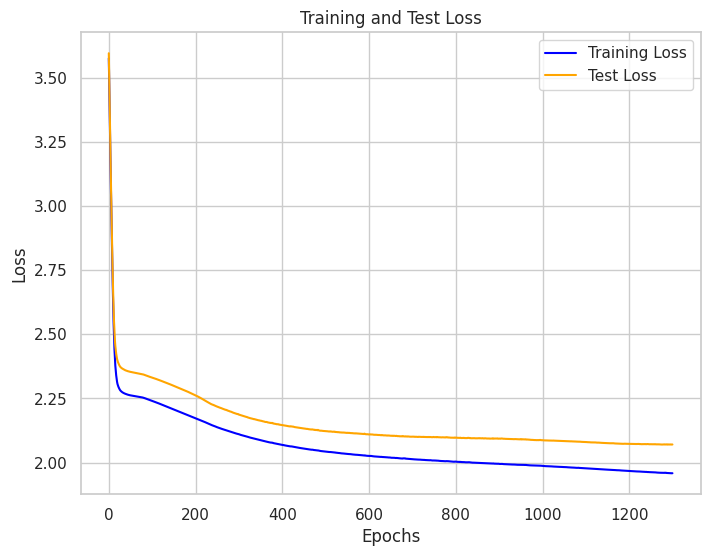

In [ ]:
# Retrieve training and validation losses from the history object
training_loss = loss_history.history['loss']
validation_loss = loss_history.history['val_loss']

# Create a plot
plt.figure(figsize=(8, 6))

# Plot training and validation losses
plt.plot(training_loss, label='Training Loss', color='blue')
plt.plot(validation_loss, label='Test Loss', color='orange')

# Set plot title and labels
plt.title('Training and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

#### Métricas

In [ ]:
y_pred = reg_nn.predict(x_test)

y_pred = y_pred.flatten()

95/95 [==============================] - 0s 1ms/step


In [ ]:
mae = mean_absolute_error(y_reg_test, y_pred)
print(mae)

2.070431709108094


El MAE = 2,05 mejoró considerablemente respecto a los anteriores (3,15+)


## Optimización de hiperparámetros

Elegimos Optuna para ajustar los hiperparámetros de nuestro modelo debido a su eficiencia en explorar configuraciones. Se adapta según los datos anteriores, acelerando la búsqueda de configuraciones prometedoras. Además, minimiza la necesidad de evaluaciones.

In [ ]:
!pip install optuna -q
import optuna

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y validación
x_train2, x_val = train_test_split(x_train, test_size=0.2, random_state=42)
y_reg_train2, y_reg_val = train_test_split(y_reg_train, test_size=0.2, random_state=42)
y_class_train2, y_class_val = train_test_split(y_class_train, test_size=0.2, random_state=42)

### Para Regresión Lineal

In [ ]:
# Define the objective function for Optuna
def objective(trial):
    params = {
      # Define hyperparameters to search
      'l1_ratio': trial.suggest_categorical('l1_ratio', [0.01, 0.2, 0.5, 0.8, 0.99]),
      'alpha': trial.suggest_float('alpha', 0, 1)
    }

    # Create and train the ElasticNet model with suggested hyperparameters
    opt_elastic_net = ElasticNet(random_state=42, **params)
    opt_elastic_net.fit(x_train2, y_reg_train2)

    # Make predictions on the test set
    y_pred = opt_elastic_net.predict(x_val)

    # Evaluate the model using R^2 score
    mae = mean_absolute_error(y_reg_val, y_pred)

    return mae

# Create an Optuna study and optimize the objective function
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100)

[I 2023-12-08 00:54:29,794] A new study created in memory with name: no-name-81f49692-efe6-46d1-8eb7-56d7c89af56f
[I 2023-12-08 00:54:29,808] Trial 0 finished with value: 3.139426129806526 and parameters: {'l1_ratio': 0.5, 'alpha': 0.32402989968252904}. Best is trial 0 with value: 3.139426129806526.
[I 2023-12-08 00:54:29,821] Trial 1 finished with value: 3.1070972512966026 and parameters: {'l1_ratio': 0.5, 'alpha': 0.9517646828019728}. Best is trial 1 with value: 3.1070972512966026.
[I 2023-12-08 00:54:29,841] Trial 2 finished with value: 3.192624442865821 and parameters: {'l1_ratio': 0.5, 'alpha': 0.12738879719535012}. Best is trial 1 with value: 3.1070972512966026.
[I 2023-12-08 00:54:29,852] Trial 3 finished with value: 3.122020543155728 and parameters: {'l1_ratio': 0.8, 'alpha': 0.4947968233724144}. Best is trial 1 with value: 3.1070972512966026.
[I 2023-12-08 00:54:29,877] Trial 4 finished with value: 3.1553525040173573 and parameters: {'l1_ratio': 0.01, 'alpha': 0.30023606661225

In [ ]:
# Get the best hyperparameters
best_params = study.best_params
print("Número total de ensayos:", len(study.trials))
print(f"Mejores hiperparámetros:", best_params)

Número total de ensayos: 100
Mejores hiperparámetros: {'l1_ratio': 0.2, 'alpha': 0.9479885392730377}


In [ ]:
# Train the ElasticNet model with the best hyperparameters
best_lin_reg = ElasticNet(random_state = 42, **best_params)
best_lin_reg.fit(x_train, y_reg_train);

#### Métricas

In [ ]:
# Make predictions on the test set using the best model
y_pred = best_lin_reg.predict(x_test)

mae = mean_absolute_error(y_reg_test, y_pred)
print(mae)

3.0084604089997526


El MAE = 3,01 de la LinearRegression optimizada parece haber encontrado unos valores de regularización que mejoraron el rendimiento anterior (3,18) debido a estar buscando minimizarlo ahora, mientras que las otras funciones minimizaban la suma de los residuos al cuadrado.

### Para Regresión Logística

In [ ]:
# Función objetivo para Optuna
def objective(trial):
    params = {
      'C': trial.suggest_float('C', 1e-5, 1, log=True),
      'max_iter': trial.suggest_int('max_iter', 100, 500),
      'penalty': trial.suggest_categorical('penalty', ['l2', None]), #l1, elasticnet
      #'solver': trial.suggest_categorical('solver', ['lbfgs', 'liblinear]),
      'class_weight': trial.suggest_categorical('class_weight', ['balanced', None])
    }

    # Crear el modelo con los valores sugeridos de C y max_iter
    opt_log_reg = LogisticRegression(random_state=42, **params)

    # Ajustar el modelo
    opt_log_reg.fit(x_train2, y_class_train2)

    # Hacer predicciones
    y_pred = opt_log_reg.predict(x_val)

    return f1_avg(y_class_val, y_pred)

# Crear el estudio de Optuna y optimizar la función objetivo
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

[I 2023-12-08 00:54:32,650] A new study created in memory with name: no-name-8de395c3-0c94-490e-9934-3bcd19da0df6
[I 2023-12-08 00:54:32,734] Trial 0 finished with value: 0.7227880512091038 and parameters: {'C': 0.0005605001490788325, 'max_iter': 491, 'penalty': None, 'class_weight': None}. Best is trial 0 with value: 0.7227880512091038.
[I 2023-12-08 00:54:32,779] Trial 1 finished with value: 0.7227880512091038 and parameters: {'C': 0.00034708263374070387, 'max_iter': 206, 'penalty': None, 'class_weight': None}. Best is trial 0 with value: 0.7227880512091038.
[I 2023-12-08 00:54:32,800] Trial 2 finished with value: 0.7063208418775492 and parameters: {'C': 0.0030505199046247417, 'max_iter': 164, 'penalty': 'l2', 'class_weight': None}. Best is trial 0 with value: 0.7227880512091038.
[I 2023-12-08 00:54:32,847] Trial 3 finished with value: 0.7285949233950473 and parameters: {'C': 0.006941610282960442, 'max_iter': 298, 'penalty': None, 'class_weight': 'balanced'}. Best is trial 3 with val

In [ ]:
# Obtener los mejores hiperparámetros
best_params = study.best_params
print("Número total de ensayos:", len(study.trials))
print("Mejores hiperparámetros:", best_params)

Número total de ensayos: 100
Mejores hiperparámetros: {'C': 0.06837437223821133, 'max_iter': 394, 'penalty': 'l2', 'class_weight': 'balanced'}


In [ ]:
# Crear el modelo con los mejores hiperparámetros
best_log_reg = LogisticRegression(random_state=42, **best_params)
# Ajustar el modelo con los datos de entrenamiento
best_log_reg.fit(x_train, y_class_train);

#### Métricas

In [ ]:
# Hacer predicciones con el conjunto de prueba
y_pred = best_log_reg.predict(x_test)

print(classification_report(y_class_test, y_pred), '\n')
print(f1_avg(y_class_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.79      0.84      2299
         1.0       0.52      0.73      0.61       723

    accuracy                           0.77      3022
   macro avg       0.71      0.76      0.73      3022
weighted avg       0.81      0.77      0.79      3022
 

0.725789035724713


El F1 promedio del modelo de LogisticRegression optimizado es = 0,73 y no mejoró respecto al original.

###  Para Red Neuronal de Clasificación

In [ ]:
import optuna
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
from tensorflow.keras.metrics import F1Score
from tensorflow.keras.utils import to_categorical

import numpy as np
from sklearn.metrics import mean_squared_error
import pandas as pd

In [ ]:
def f1_avg_tf(y_true, y_pred):
    # Calculate true positives, false positives, false negatives for each class
    TP = tf.reduce_sum(tf.cast(tf.logical_and(tf.equal(y_true, 1), tf.equal(tf.round(y_pred), 1)), tf.float32))
    FP = tf.reduce_sum(tf.cast(tf.logical_and(tf.equal(y_true, 0), tf.equal(tf.round(y_pred), 1)), tf.float32))
    FN = tf.reduce_sum(tf.cast(tf.logical_and(tf.equal(y_true, 1), tf.equal(tf.round(y_pred), 0)), tf.float32))
    TN = tf.reduce_sum(tf.cast(tf.logical_and(tf.equal(y_true, 0), tf.equal(tf.round(y_pred), 0)), tf.float32))

    precision_1 = TP / (TP + FP + tf.keras.backend.epsilon())
    recall_1 = TP / (TP + FN + tf.keras.backend.epsilon())

    precision_0 = TN / (TN + FN + tf.keras.backend.epsilon())
    recall_0 = TN / (TN + FP + tf.keras.backend.epsilon())

    f1_1 = 2 * precision_1 * recall_1 / (precision_1 + recall_1 + tf.keras.backend.epsilon())
    f1_0 = 2 * precision_0 * recall_0 / (precision_0 + recall_0 + tf.keras.backend.epsilon())

    f1 = (f1_1 + f1_0)/2

    # Return F1 scores for each class
    return f1

In [ ]:
# Definir la función objetivo para Optuna
def objective(trial):
    #Hiperparámetros:
    params = {
        "metric": f1_avg_tf,
        "n_hidden_layers": trial.suggest_int('n_hidden_layers', 1, 2),
        "learning_rate": trial.suggest_float('learning_rate', 0.001, 0.1, log=True),
        "epochs_type": trial.suggest_categorical('epochs_type', ['_250_epocas_largas', '_500_epocas_medianas', '_1000_epocas_cortas'])
    }
    n_hidden_layers = params["n_hidden_layers"]
    params["activations"] = ["sigmoid"] * n_hidden_layers
    params["n_neurons"] = [1] * n_hidden_layers

    for i in range(n_hidden_layers):
        params["n_neurons"][i] = trial.suggest_int(f'n_neurons_{i}', 1, 4)
        params["activations"][i] = trial.suggest_categorical(f'activations_{i}', ['relu', 'sigmoid', 'tanh'])

    # Creación
    opt_class_nn = ClassificationNeuralNetwork(**params)

    # Entrenar el modelo
    loss_history = opt_class_nn.fit(x_train2, y_class_train2, validation_data=(x_val, y_class_val))

    # Evaluar el modelo
    return opt_class_nn.evaluate(x_val, y_class_val)[1] #el 0 tiene el loss

# Crear un estudio de Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

[I 2023-12-08 01:08:39,320] A new study created in memory with name: no-name-2e50946e-8df6-48a6-8ec4-642d535ee3c7


Epoch 1/500
20/20 [==============================] - 2s 17ms/step - loss: 0.6678 - f1_avg_tf: 0.4830 - val_loss: 0.6365 - val_f1_avg_tf: 0.4579
Epoch 2/500
20/20 [==============================] - 0s 6ms/step - loss: 0.6120 - f1_avg_tf: 0.4791 - val_loss: 0.5874 - val_f1_avg_tf: 0.5586
Epoch 3/500
20/20 [==============================] - 0s 6ms/step - loss: 0.5660 - f1_avg_tf: 0.6474 - val_loss: 0.5452 - val_f1_avg_tf: 0.6921
Epoch 4/500
20/20 [==============================] - 0s 5ms/step - loss: 0.5270 - f1_avg_tf: 0.6984 - val_loss: 0.5091 - val_f1_avg_tf: 0.7113
Epoch 5/500
20/20 [==============================] - 0s 4ms/step - loss: 0.4939 - f1_avg_tf: 0.7034 - val_loss: 0.4809 - val_f1_avg_tf: 0.7272
Epoch 6/500
20/20 [==============================] - 0s 4ms/step - loss: 0.4690 - f1_avg_tf: 0.7233 - val_loss: 0.4598 - val_f1_avg_tf: 0.7341
Epoch 7/500
20/20 [==============================] - 0s 3ms/step - loss: 0.4523 - f1_avg_tf: 0.7244 - val_loss: 0.4472 - val_f1_avg_tf: 0.735

[I 2023-12-08 01:10:03,426] Trial 0 finished with value: 0.7158770561218262 and parameters: {'n_hidden_layers': 2, 'learning_rate': 0.011818456128394038, 'epochs_type': '_500_epocas_medianas', 'n_neurons_0': 3, 'activations_0': 'sigmoid', 'n_neurons_1': 2, 'activations_1': 'relu'}. Best is trial 0 with value: 0.7158770561218262.


Epoch 1/500
20/20 [==============================] - 1s 11ms/step - loss: 0.6256 - f1_avg_tf: 0.6085 - val_loss: 0.5428 - val_f1_avg_tf: 0.7104
Epoch 2/500
20/20 [==============================] - 0s 3ms/step - loss: 0.5138 - f1_avg_tf: 0.7199 - val_loss: 0.4757 - val_f1_avg_tf: 0.7359
Epoch 3/500
20/20 [==============================] - 0s 4ms/step - loss: 0.4601 - f1_avg_tf: 0.7208 - val_loss: 0.4404 - val_f1_avg_tf: 0.7393
Epoch 4/500
20/20 [==============================] - 0s 5ms/step - loss: 0.4350 - f1_avg_tf: 0.7246 - val_loss: 0.4258 - val_f1_avg_tf: 0.7404
Epoch 5/500
20/20 [==============================] - 0s 3ms/step - loss: 0.4230 - f1_avg_tf: 0.7242 - val_loss: 0.4191 - val_f1_avg_tf: 0.7375
Epoch 6/500
20/20 [==============================] - 0s 3ms/step - loss: 0.4172 - f1_avg_tf: 0.7300 - val_loss: 0.4159 - val_f1_avg_tf: 0.7307
Epoch 7/500
20/20 [==============================] - 0s 4ms/step - loss: 0.4127 - f1_avg_tf: 0.7201 - val_loss: 0.4118 - val_f1_avg_tf: 0.737

[I 2023-12-08 01:11:26,203] Trial 1 finished with value: 0.7236634492874146 and parameters: {'n_hidden_layers': 2, 'learning_rate': 0.008865049926873717, 'epochs_type': '_500_epocas_medianas', 'n_neurons_0': 3, 'activations_0': 'tanh', 'n_neurons_1': 1, 'activations_1': 'tanh'}. Best is trial 1 with value: 0.7236634492874146.


Epoch 1/800
4/4 [==============================] - 1s 83ms/step - loss: 1.0584 - f1_avg_tf: 0.1876 - val_loss: 0.9647 - val_f1_avg_tf: 0.1926
Epoch 2/800
4/4 [==============================] - 0s 13ms/step - loss: 0.9282 - f1_avg_tf: 0.1876 - val_loss: 0.8533 - val_f1_avg_tf: 0.1951
Epoch 3/800
4/4 [==============================] - 0s 12ms/step - loss: 0.8281 - f1_avg_tf: 0.2146 - val_loss: 0.7786 - val_f1_avg_tf: 0.2794
Epoch 4/800
4/4 [==============================] - 0s 13ms/step - loss: 0.7603 - f1_avg_tf: 0.3251 - val_loss: 0.7230 - val_f1_avg_tf: 0.4033
Epoch 5/800
4/4 [==============================] - 0s 14ms/step - loss: 0.7067 - f1_avg_tf: 0.4389 - val_loss: 0.6775 - val_f1_avg_tf: 0.5006
Epoch 6/800
4/4 [==============================] - 0s 22ms/step - loss: 0.6638 - f1_avg_tf: 0.5355 - val_loss: 0.6406 - val_f1_avg_tf: 0.5870
Epoch 7/800
4/4 [==============================] - 0s 15ms/step - loss: 0.6296 - f1_avg_tf: 0.5889 - val_loss: 0.6113 - val_f1_avg_tf: 0.6173
Epoch 

[I 2023-12-08 01:12:11,308] Trial 2 finished with value: 0.7045781016349792 and parameters: {'n_hidden_layers': 2, 'learning_rate': 0.018084815532104774, 'epochs_type': '_1000_epocas_cortas', 'n_neurons_0': 4, 'activations_0': 'relu', 'n_neurons_1': 1, 'activations_1': 'sigmoid'}. Best is trial 1 with value: 0.7236634492874146.


Epoch 1/500
20/20 [==============================] - 1s 11ms/step - loss: 0.7800 - f1_avg_tf: 0.4844 - val_loss: 0.7386 - val_f1_avg_tf: 0.4990
Epoch 2/500
20/20 [==============================] - 0s 6ms/step - loss: 0.7003 - f1_avg_tf: 0.5151 - val_loss: 0.6665 - val_f1_avg_tf: 0.5554
Epoch 3/500
20/20 [==============================] - 0s 6ms/step - loss: 0.6397 - f1_avg_tf: 0.5746 - val_loss: 0.6131 - val_f1_avg_tf: 0.6091
Epoch 4/500
20/20 [==============================] - 0s 4ms/step - loss: 0.5958 - f1_avg_tf: 0.6252 - val_loss: 0.5741 - val_f1_avg_tf: 0.6481
Epoch 5/500
20/20 [==============================] - 0s 3ms/step - loss: 0.5645 - f1_avg_tf: 0.6499 - val_loss: 0.5451 - val_f1_avg_tf: 0.6789
Epoch 6/500
20/20 [==============================] - 0s 3ms/step - loss: 0.5408 - f1_avg_tf: 0.6765 - val_loss: 0.5230 - val_f1_avg_tf: 0.6971
Epoch 7/500
20/20 [==============================] - 0s 3ms/step - loss: 0.5221 - f1_avg_tf: 0.6936 - val_loss: 0.5057 - val_f1_avg_tf: 0.708

[I 2023-12-08 01:12:53,728] Trial 3 finished with value: 0.7344115376472473 and parameters: {'n_hidden_layers': 1, 'learning_rate': 0.0011425834331997412, 'epochs_type': '_500_epocas_medianas', 'n_neurons_0': 4, 'activations_0': 'tanh'}. Best is trial 3 with value: 0.7344115376472473.


Epoch 1/500
20/20 [==============================] - 1s 11ms/step - loss: 0.6708 - f1_avg_tf: 0.4334 - val_loss: 0.6588 - val_f1_avg_tf: 0.4319
Epoch 2/500
20/20 [==============================] - 0s 4ms/step - loss: 0.6420 - f1_avg_tf: 0.4330 - val_loss: 0.6304 - val_f1_avg_tf: 0.4319
Epoch 3/500
20/20 [==============================] - 0s 4ms/step - loss: 0.6129 - f1_avg_tf: 0.4343 - val_loss: 0.6030 - val_f1_avg_tf: 0.4319
Epoch 4/500
20/20 [==============================] - 0s 4ms/step - loss: 0.5867 - f1_avg_tf: 0.4345 - val_loss: 0.5791 - val_f1_avg_tf: 0.4319
Epoch 5/500
20/20 [==============================] - 0s 4ms/step - loss: 0.5648 - f1_avg_tf: 0.4348 - val_loss: 0.5598 - val_f1_avg_tf: 0.4319
Epoch 6/500
20/20 [==============================] - 0s 3ms/step - loss: 0.5469 - f1_avg_tf: 0.4337 - val_loss: 0.5441 - val_f1_avg_tf: 0.4319
Epoch 7/500
20/20 [==============================] - 0s 3ms/step - loss: 0.5317 - f1_avg_tf: 0.4336 - val_loss: 0.5309 - val_f1_avg_tf: 0.431

[I 2023-12-08 01:13:36,529] Trial 4 finished with value: 0.7116022706031799 and parameters: {'n_hidden_layers': 2, 'learning_rate': 0.0017479299153499814, 'epochs_type': '_500_epocas_medianas', 'n_neurons_0': 1, 'activations_0': 'relu', 'n_neurons_1': 2, 'activations_1': 'tanh'}. Best is trial 3 with value: 0.7344115376472473.


Epoch 1/500
20/20 [==============================] - 1s 11ms/step - loss: 0.4802 - f1_avg_tf: 0.4390 - val_loss: 0.4360 - val_f1_avg_tf: 0.4319
Epoch 2/500
20/20 [==============================] - 0s 4ms/step - loss: 0.4238 - f1_avg_tf: 0.6781 - val_loss: 0.4192 - val_f1_avg_tf: 0.7182
Epoch 3/500
20/20 [==============================] - 0s 4ms/step - loss: 0.4120 - f1_avg_tf: 0.7268 - val_loss: 0.4066 - val_f1_avg_tf: 0.7226
Epoch 4/500
20/20 [==============================] - 0s 3ms/step - loss: 0.4081 - f1_avg_tf: 0.7268 - val_loss: 0.4106 - val_f1_avg_tf: 0.7264
Epoch 5/500
20/20 [==============================] - 0s 4ms/step - loss: 0.4035 - f1_avg_tf: 0.7306 - val_loss: 0.4043 - val_f1_avg_tf: 0.7243
Epoch 6/500
20/20 [==============================] - 0s 4ms/step - loss: 0.4023 - f1_avg_tf: 0.7210 - val_loss: 0.3991 - val_f1_avg_tf: 0.7390
Epoch 7/500
20/20 [==============================] - 0s 4ms/step - loss: 0.4006 - f1_avg_tf: 0.7233 - val_loss: 0.4007 - val_f1_avg_tf: 0.739

[I 2023-12-08 01:14:19,219] Trial 5 finished with value: 0.7086657881736755 and parameters: {'n_hidden_layers': 1, 'learning_rate': 0.08216387037801016, 'epochs_type': '_500_epocas_medianas', 'n_neurons_0': 2, 'activations_0': 'sigmoid'}. Best is trial 3 with value: 0.7344115376472473.


Epoch 1/800
4/4 [==============================] - 1s 82ms/step - loss: 0.6397 - f1_avg_tf: 0.5583 - val_loss: 0.5557 - val_f1_avg_tf: 0.4323
Epoch 2/800
4/4 [==============================] - 0s 27ms/step - loss: 0.5196 - f1_avg_tf: 0.4348 - val_loss: 0.4735 - val_f1_avg_tf: 0.4323
Epoch 3/800
4/4 [==============================] - 0s 16ms/step - loss: 0.4588 - f1_avg_tf: 0.4346 - val_loss: 0.4512 - val_f1_avg_tf: 0.4323
Epoch 4/800
4/4 [==============================] - 0s 24ms/step - loss: 0.4442 - f1_avg_tf: 0.4347 - val_loss: 0.4526 - val_f1_avg_tf: 0.4323
Epoch 5/800
4/4 [==============================] - 0s 15ms/step - loss: 0.4451 - f1_avg_tf: 0.4346 - val_loss: 0.4498 - val_f1_avg_tf: 0.4323
Epoch 6/800
4/4 [==============================] - 0s 22ms/step - loss: 0.4411 - f1_avg_tf: 0.4347 - val_loss: 0.4384 - val_f1_avg_tf: 0.4323
Epoch 7/800
4/4 [==============================] - 0s 29ms/step - loss: 0.4325 - f1_avg_tf: 0.4345 - val_loss: 0.4273 - val_f1_avg_tf: 0.4323
Epoch 

[I 2023-12-08 01:15:42,088] Trial 6 finished with value: 0.6851015686988831 and parameters: {'n_hidden_layers': 2, 'learning_rate': 0.033421278456866356, 'epochs_type': '_1000_epocas_cortas', 'n_neurons_0': 1, 'activations_0': 'tanh', 'n_neurons_1': 4, 'activations_1': 'relu'}. Best is trial 3 with value: 0.7344115376472473.


Epoch 1/800
4/4 [==============================] - 1s 60ms/step - loss: 0.7052 - f1_avg_tf: 0.4694 - val_loss: 0.5707 - val_f1_avg_tf: 0.5209
Epoch 2/800
4/4 [==============================] - 0s 12ms/step - loss: 0.5343 - f1_avg_tf: 0.5050 - val_loss: 0.4915 - val_f1_avg_tf: 0.5263
Epoch 3/800
4/4 [==============================] - 0s 15ms/step - loss: 0.4667 - f1_avg_tf: 0.5493 - val_loss: 0.4537 - val_f1_avg_tf: 0.5758
Epoch 4/800
4/4 [==============================] - 0s 13ms/step - loss: 0.4535 - f1_avg_tf: 0.5686 - val_loss: 0.4568 - val_f1_avg_tf: 0.5661
Epoch 5/800
4/4 [==============================] - 0s 12ms/step - loss: 0.4414 - f1_avg_tf: 0.5987 - val_loss: 0.4302 - val_f1_avg_tf: 0.7163
Epoch 6/800
4/4 [==============================] - 0s 13ms/step - loss: 0.4205 - f1_avg_tf: 0.7194 - val_loss: 0.4263 - val_f1_avg_tf: 0.7260
Epoch 7/800
4/4 [==============================] - 0s 12ms/step - loss: 0.4192 - f1_avg_tf: 0.7309 - val_loss: 0.4260 - val_f1_avg_tf: 0.7221
Epoch 

[I 2023-12-08 01:17:05,071] Trial 7 finished with value: 0.7059160470962524 and parameters: {'n_hidden_layers': 2, 'learning_rate': 0.08757444299310498, 'epochs_type': '_1000_epocas_cortas', 'n_neurons_0': 4, 'activations_0': 'tanh', 'n_neurons_1': 3, 'activations_1': 'relu'}. Best is trial 3 with value: 0.7344115376472473.


Epoch 1/250
98/98 [==============================] - 1s 4ms/step - loss: 0.5884 - f1_avg_tf: 0.4351 - val_loss: 0.5280 - val_f1_avg_tf: 0.4317
Epoch 2/250
98/98 [==============================] - 0s 3ms/step - loss: 0.4990 - f1_avg_tf: 0.4345 - val_loss: 0.4803 - val_f1_avg_tf: 0.4317
Epoch 3/250
98/98 [==============================] - 0s 3ms/step - loss: 0.4554 - f1_avg_tf: 0.4344 - val_loss: 0.4449 - val_f1_avg_tf: 0.4317
Epoch 4/250
98/98 [==============================] - 0s 3ms/step - loss: 0.4359 - f1_avg_tf: 0.4344 - val_loss: 0.4323 - val_f1_avg_tf: 0.4317
Epoch 5/250
98/98 [==============================] - 0s 2ms/step - loss: 0.4286 - f1_avg_tf: 0.5457 - val_loss: 0.4263 - val_f1_avg_tf: 0.7295
Epoch 6/250
98/98 [==============================] - 0s 3ms/step - loss: 0.4228 - f1_avg_tf: 0.7245 - val_loss: 0.4150 - val_f1_avg_tf: 0.7349
Epoch 7/250
98/98 [==============================] - 0s 3ms/step - loss: 0.4129 - f1_avg_tf: 0.7307 - val_loss: 0.4092 - val_f1_avg_tf: 0.7360

[I 2023-12-08 01:18:27,875] Trial 8 finished with value: 0.7003929018974304 and parameters: {'n_hidden_layers': 2, 'learning_rate': 0.003473315426466072, 'epochs_type': '_250_epocas_largas', 'n_neurons_0': 1, 'activations_0': 'relu', 'n_neurons_1': 3, 'activations_1': 'tanh'}. Best is trial 3 with value: 0.7344115376472473.


Epoch 1/250
98/98 [==============================] - 1s 3ms/step - loss: 0.7086 - f1_avg_tf: 0.5340 - val_loss: 0.5662 - val_f1_avg_tf: 0.6326
Epoch 2/250
98/98 [==============================] - 0s 2ms/step - loss: 0.5110 - f1_avg_tf: 0.6561 - val_loss: 0.4690 - val_f1_avg_tf: 0.6783
Epoch 3/250
98/98 [==============================] - 0s 2ms/step - loss: 0.4538 - f1_avg_tf: 0.6888 - val_loss: 0.4356 - val_f1_avg_tf: 0.7005
Epoch 4/250
98/98 [==============================] - 0s 2ms/step - loss: 0.4300 - f1_avg_tf: 0.6981 - val_loss: 0.4192 - val_f1_avg_tf: 0.7111
Epoch 5/250
98/98 [==============================] - 0s 2ms/step - loss: 0.4169 - f1_avg_tf: 0.7072 - val_loss: 0.4094 - val_f1_avg_tf: 0.7172
Epoch 6/250
98/98 [==============================] - 0s 2ms/step - loss: 0.4086 - f1_avg_tf: 0.7119 - val_loss: 0.4026 - val_f1_avg_tf: 0.7221
Epoch 7/250
98/98 [==============================] - 0s 2ms/step - loss: 0.4030 - f1_avg_tf: 0.7120 - val_loss: 0.3979 - val_f1_avg_tf: 0.7218

[I 2023-12-08 01:19:50,529] Trial 9 finished with value: 0.7028207182884216 and parameters: {'n_hidden_layers': 1, 'learning_rate': 0.0015932668796974569, 'epochs_type': '_250_epocas_largas', 'n_neurons_0': 3, 'activations_0': 'relu'}. Best is trial 3 with value: 0.7344115376472473.


In [ ]:
# Obtener los mejores hiperparámetros
best_params = study.best_params
print("Número total de ensayos:", len(study.trials))
print("Mejores hiperparámetros:", best_params)

Número total de ensayos: 10
Mejores hiperparámetros: {'n_hidden_layers': 1, 'learning_rate': 0.0011425834331997412, 'epochs_type': '_500_epocas_medianas', 'n_neurons_0': 4, 'activations_0': 'tanh'}


In [ ]:
# Cambiamos las keys de "n_neurons_i" a "n_neurons[i] y lo mismo con activations"
n_hidden_layers = best_params["n_hidden_layers"]
best_params['n_neurons']=[1] *n_hidden_layers
best_params['activations']=['sigmoid'] *n_hidden_layers
for i in range(n_hidden_layers):
    best_params['n_neurons'][i] = best_params.pop(f'n_neurons_{i}')
    best_params['activations'][i] = best_params.pop(f"activations_{i}")

#Create the model with the best hyperparameters
best_class_nn = ClassificationNeuralNetwork(**best_params)
loss_history = best_class_nn.fit(x_train, y_class_train, validation_data=(x_test, y_class_test));

Epoch 1/500
24/24 [==============================] - 1s 9ms/step - loss: 0.6967 - val_loss: 0.6760
Epoch 2/500
24/24 [==============================] - 0s 4ms/step - loss: 0.6587 - val_loss: 0.6419
Epoch 3/500
24/24 [==============================] - 0s 5ms/step - loss: 0.6284 - val_loss: 0.6142
Epoch 4/500
24/24 [==============================] - 0s 3ms/step - loss: 0.6030 - val_loss: 0.5898
Epoch 5/500
24/24 [==============================] - 0s 3ms/step - loss: 0.5799 - val_loss: 0.5674
Epoch 6/500
24/24 [==============================] - 0s 3ms/step - loss: 0.5579 - val_loss: 0.5459
Epoch 7/500
24/24 [==============================] - 0s 3ms/step - loss: 0.5363 - val_loss: 0.5250
Epoch 8/500
24/24 [==============================] - 0s 3ms/step - loss: 0.5152 - val_loss: 0.5049
Epoch 9/500
24/24 [==============================] - 0s 3ms/step - loss: 0.4948 - val_loss: 0.4865
Epoch 10/500
24/24 [==============================] - 0s 4ms/step - loss: 0.4764 - val_loss: 0.4700
Epoch 11/

#### Errores por épocas

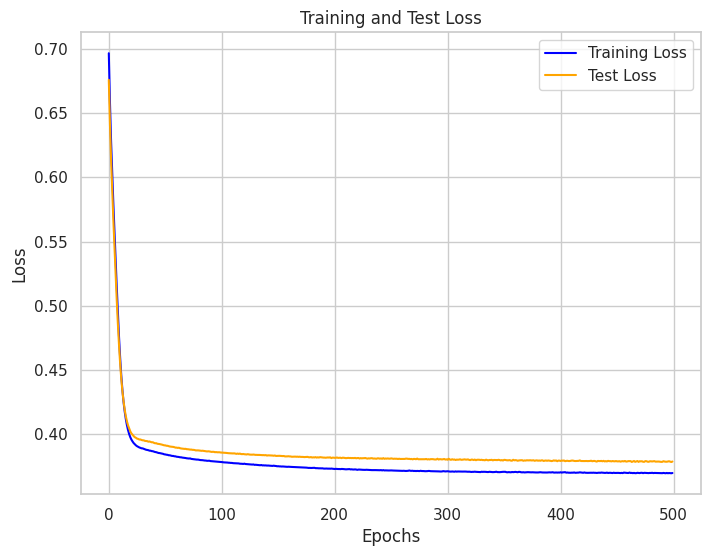

In [ ]:
# Retrieve training and validation losses from the history object
training_loss = loss_history.history['loss']
validation_loss = loss_history.history['val_loss']

# Create a plot
plt.figure(figsize=(8, 6))

# Plot training and validation losses
plt.plot(training_loss, label='Training Loss', color='blue')
plt.plot(validation_loss, label='Test Loss', color='orange')

# Set plot title and labels
plt.title('Training and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


plt.show()

No es la F1 pero sirve para darse una idea del comportamiento de la misma.

#### Métricas

In [ ]:
# Make predictions on the test set using the best model
y_pred = best_class_nn.predict(x_test)
threshold = 0.5
y_pred = (y_pred > threshold).astype(float)

# Evaluate the final model using F1
f1 = f1_avg(y_class_test, y_pred)
print(f1)

95/95 [==============================] - 0s 892us/step
0.7504033073001584


El F1 promedio de una red neuronal de clasificación optimizada es = 0,75 y prácticamente ni mejoró frente a la red neuronal original.

### Para Red Neuronal de Regresión

In [ ]:
# Definir la función objetivo para Optuna
def objective(trial):
    #Hiperparámetros:
    params = {
        "n_hidden_layers": trial.suggest_int('n_hidden_layers', 1, 2),
        "learning_rate": trial.suggest_float('learning_rate', 0.001, 0.1, log=True),
        "epochs_type": trial.suggest_categorical('epochs_type', ['_250_epocas_largas', '_500_epocas_medianas', '_1000_epocas_cortas'])
    }
    n_hidden_layers = params["n_hidden_layers"]
    params["activations"] = ["sigmoid"] * n_hidden_layers
    params["n_neurons"] = [1] * n_hidden_layers

    for i in range(n_hidden_layers):
        params["n_neurons"][i] = trial.suggest_int(f'n_neurons_{i}', 1, 4)
        params["activations"][i] = trial.suggest_categorical(f'activations_{i}', ['relu', 'sigmoid', 'tanh'])

    # Creación
    opt_reg_nn = RegressionNeuralNetwork(**params)

    # Entrenar el modelo
    loss_history = opt_reg_nn.fit(x_train2, y_reg_train2, validation_data=(x_val, y_reg_val))

    # Evaluar el modelo
    return opt_reg_nn.evaluate(x_val, y_reg_val)

# Crear un estudio de Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)

[I 2023-12-08 00:58:00,014] A new study created in memory with name: no-name-e1560e29-d0d1-4668-9a19-426cee203c3f


Epoch 1/500
20/20 [==============================] - 1s 12ms/step - loss: 2.2335 - val_loss: 2.5065
Epoch 2/500
20/20 [==============================] - 0s 3ms/step - loss: 2.2289 - val_loss: 2.5054
Epoch 3/500
20/20 [==============================] - 0s 4ms/step - loss: 2.2280 - val_loss: 2.5049
Epoch 4/500
20/20 [==============================] - 0s 4ms/step - loss: 2.2274 - val_loss: 2.5043
Epoch 5/500
20/20 [==============================] - 0s 4ms/step - loss: 2.2267 - val_loss: 2.5032
Epoch 6/500
20/20 [==============================] - 0s 4ms/step - loss: 2.2254 - val_loss: 2.5015
Epoch 7/500
20/20 [==============================] - 0s 4ms/step - loss: 2.2236 - val_loss: 2.4992
Epoch 8/500
20/20 [==============================] - 0s 4ms/step - loss: 2.2208 - val_loss: 2.4955
Epoch 9/500
20/20 [==============================] - 0s 3ms/step - loss: 2.2168 - val_loss: 2.4909
Epoch 10/500
20/20 [==============================] - 0s 3ms/step - loss: 2.2126 - val_loss: 2.4871
Epoch 11

[I 2023-12-08 00:58:36,404] Trial 0 finished with value: 2.196040630340576 and parameters: {'n_hidden_layers': 2, 'learning_rate': 0.0015040402944256999, 'epochs_type': '_500_epocas_medianas', 'n_neurons_0': 3, 'activations_0': 'tanh', 'n_neurons_1': 2, 'activations_1': 'tanh'}. Best is trial 0 with value: 2.196040630340576.


Epoch 1/250
98/98 [==============================] - 0s 2ms/step - loss: 2.2536 - val_loss: 2.4609
Epoch 2/250
98/98 [==============================] - 0s 2ms/step - loss: 2.2042 - val_loss: 2.4432
Epoch 3/250
98/98 [==============================] - 0s 2ms/step - loss: 2.2089 - val_loss: 2.4526
Epoch 4/250
98/98 [==============================] - 0s 2ms/step - loss: 2.2090 - val_loss: 2.4629
Epoch 5/250
98/98 [==============================] - 0s 2ms/step - loss: 2.2122 - val_loss: 2.4413
Epoch 6/250
98/98 [==============================] - 0s 2ms/step - loss: 2.2016 - val_loss: 2.4607
Epoch 7/250
98/98 [==============================] - 0s 2ms/step - loss: 2.2036 - val_loss: 2.4573
Epoch 8/250
98/98 [==============================] - 0s 2ms/step - loss: 2.2066 - val_loss: 2.4562
Epoch 9/250
98/98 [==============================] - 0s 2ms/step - loss: 2.2095 - val_loss: 2.4554
Epoch 10/250
98/98 [==============================] - 0s 2ms/step - loss: 2.2087 - val_loss: 2.4627
Epoch 11/

[I 2023-12-08 00:59:40,128] Trial 1 finished with value: 2.473459482192993 and parameters: {'n_hidden_layers': 1, 'learning_rate': 0.04634652626728935, 'epochs_type': '_250_epocas_largas', 'n_neurons_0': 4, 'activations_0': 'relu'}. Best is trial 0 with value: 2.196040630340576.


Epoch 1/500
20/20 [==============================] - 0s 6ms/step - loss: 2.8368 - val_loss: 2.7772
Epoch 2/500
20/20 [==============================] - 0s 3ms/step - loss: 2.3978 - val_loss: 2.5685
Epoch 3/500
20/20 [==============================] - 0s 3ms/step - loss: 2.2533 - val_loss: 2.4701
Epoch 4/500
20/20 [==============================] - 0s 3ms/step - loss: 2.2013 - val_loss: 2.4466
Epoch 5/500
20/20 [==============================] - 0s 4ms/step - loss: 2.1901 - val_loss: 2.4386
Epoch 6/500
20/20 [==============================] - 0s 3ms/step - loss: 2.1865 - val_loss: 2.4374
Epoch 7/500
20/20 [==============================] - 0s 4ms/step - loss: 2.1867 - val_loss: 2.4382
Epoch 8/500
20/20 [==============================] - 0s 3ms/step - loss: 2.1863 - val_loss: 2.4374
Epoch 9/500
20/20 [==============================] - 0s 2ms/step - loss: 2.1873 - val_loss: 2.4372
Epoch 10/500
20/20 [==============================] - 0s 2ms/step - loss: 2.1857 - val_loss: 2.4356
Epoch 11/

[I 2023-12-08 01:00:21,757] Trial 2 finished with value: 2.4375877380371094 and parameters: {'n_hidden_layers': 1, 'learning_rate': 0.009710282752972126, 'epochs_type': '_500_epocas_medianas', 'n_neurons_0': 1, 'activations_0': 'tanh'}. Best is trial 0 with value: 2.196040630340576.


Epoch 1/800
4/4 [==============================] - 1s 47ms/step - loss: 2.4254 - val_loss: 2.6622
Epoch 2/800
4/4 [==============================] - 0s 16ms/step - loss: 2.3613 - val_loss: 2.6052
Epoch 3/800
4/4 [==============================] - 0s 14ms/step - loss: 2.3119 - val_loss: 2.5660
Epoch 4/800
4/4 [==============================] - 0s 12ms/step - loss: 2.2794 - val_loss: 2.5420
Epoch 5/800
4/4 [==============================] - 0s 20ms/step - loss: 2.2594 - val_loss: 2.5260
Epoch 6/800
4/4 [==============================] - 0s 19ms/step - loss: 2.2457 - val_loss: 2.5140
Epoch 7/800
4/4 [==============================] - 0s 18ms/step - loss: 2.2354 - val_loss: 2.5053
Epoch 8/800
4/4 [==============================] - 0s 19ms/step - loss: 2.2285 - val_loss: 2.5000
Epoch 9/800
4/4 [==============================] - 0s 17ms/step - loss: 2.2240 - val_loss: 2.4964
Epoch 10/800
4/4 [==============================] - 0s 16ms/step - loss: 2.2204 - val_loss: 2.4934
Epoch 11/800
4/4 [=

[I 2023-12-08 01:00:59,784] Trial 3 finished with value: 2.22701096534729 and parameters: {'n_hidden_layers': 2, 'learning_rate': 0.006758232729440591, 'epochs_type': '_1000_epocas_cortas', 'n_neurons_0': 2, 'activations_0': 'tanh', 'n_neurons_1': 3, 'activations_1': 'sigmoid'}. Best is trial 0 with value: 2.196040630340576.


Epoch 1/800
4/4 [==============================] - 0s 42ms/step - loss: 2.9330 - val_loss: 3.1335
Epoch 2/800
4/4 [==============================] - 0s 14ms/step - loss: 2.8596 - val_loss: 3.0642
Epoch 3/800
4/4 [==============================] - 0s 11ms/step - loss: 2.7934 - val_loss: 3.0020
Epoch 4/800
4/4 [==============================] - 0s 11ms/step - loss: 2.7336 - val_loss: 2.9476
Epoch 5/800
4/4 [==============================] - 0s 22ms/step - loss: 2.6803 - val_loss: 2.8990
Epoch 6/800
4/4 [==============================] - 0s 15ms/step - loss: 2.6329 - val_loss: 2.8567
Epoch 7/800
4/4 [==============================] - 0s 20ms/step - loss: 2.5916 - val_loss: 2.8192
Epoch 8/800
4/4 [==============================] - 0s 22ms/step - loss: 2.5549 - val_loss: 2.7855
Epoch 9/800
4/4 [==============================] - 0s 16ms/step - loss: 2.5218 - val_loss: 2.7544
Epoch 10/800
4/4 [==============================] - 0s 22ms/step - loss: 2.4923 - val_loss: 2.7254
Epoch 11/800
4/4 [=

[I 2023-12-08 01:01:39,512] Trial 4 finished with value: 2.435086250305176 and parameters: {'n_hidden_layers': 1, 'learning_rate': 0.004353352783731969, 'epochs_type': '_1000_epocas_cortas', 'n_neurons_0': 2, 'activations_0': 'tanh'}. Best is trial 0 with value: 2.196040630340576.


Epoch 1/500
20/20 [==============================] - 0s 9ms/step - loss: 2.4922 - val_loss: 2.4881
Epoch 2/500
20/20 [==============================] - 0s 4ms/step - loss: 2.2230 - val_loss: 2.4584
Epoch 3/500
20/20 [==============================] - 0s 5ms/step - loss: 2.1979 - val_loss: 2.4447
Epoch 4/500
20/20 [==============================] - 0s 4ms/step - loss: 2.1959 - val_loss: 2.4495
Epoch 5/500
20/20 [==============================] - 0s 4ms/step - loss: 2.1914 - val_loss: 2.4439
Epoch 6/500
20/20 [==============================] - 0s 3ms/step - loss: 2.1907 - val_loss: 2.4437
Epoch 7/500
20/20 [==============================] - 0s 4ms/step - loss: 2.1902 - val_loss: 2.4399
Epoch 8/500
20/20 [==============================] - 0s 3ms/step - loss: 2.1910 - val_loss: 2.4410
Epoch 9/500
20/20 [==============================] - 0s 3ms/step - loss: 2.1921 - val_loss: 2.4390
Epoch 10/500
20/20 [==============================] - 0s 4ms/step - loss: 2.1888 - val_loss: 2.4382
Epoch 11/

[I 2023-12-08 01:02:21,018] Trial 5 finished with value: 2.4376227855682373 and parameters: {'n_hidden_layers': 1, 'learning_rate': 0.02295438245364027, 'epochs_type': '_500_epocas_medianas', 'n_neurons_0': 2, 'activations_0': 'tanh'}. Best is trial 0 with value: 2.196040630340576.


Epoch 1/800
4/4 [==============================] - 0s 36ms/step - loss: 2.8480 - val_loss: 2.7394
Epoch 2/800
4/4 [==============================] - 0s 10ms/step - loss: 2.3712 - val_loss: 2.5564
Epoch 3/800
4/4 [==============================] - 0s 12ms/step - loss: 2.3091 - val_loss: 2.5566
Epoch 4/800
4/4 [==============================] - 0s 11ms/step - loss: 2.2883 - val_loss: 2.5241
Epoch 5/800
4/4 [==============================] - 0s 10ms/step - loss: 2.2653 - val_loss: 2.5036
Epoch 6/800
4/4 [==============================] - 0s 9ms/step - loss: 2.2417 - val_loss: 2.4697
Epoch 7/800
4/4 [==============================] - 0s 10ms/step - loss: 2.2254 - val_loss: 2.4581
Epoch 8/800
4/4 [==============================] - 0s 11ms/step - loss: 2.2096 - val_loss: 2.4415
Epoch 9/800
4/4 [==============================] - 0s 10ms/step - loss: 2.2019 - val_loss: 2.4444
Epoch 10/800
4/4 [==============================] - 0s 10ms/step - loss: 2.1945 - val_loss: 2.4381
Epoch 11/800
4/4 [==

[I 2023-12-08 01:03:02,509] Trial 6 finished with value: 2.4354841709136963 and parameters: {'n_hidden_layers': 1, 'learning_rate': 0.05307311733190735, 'epochs_type': '_1000_epocas_cortas', 'n_neurons_0': 1, 'activations_0': 'tanh'}. Best is trial 0 with value: 2.196040630340576.


Epoch 1/800
4/4 [==============================] - 0s 45ms/step - loss: 2.6452 - val_loss: 2.9007
Epoch 2/800
4/4 [==============================] - 0s 14ms/step - loss: 2.6094 - val_loss: 2.8654
Epoch 3/800
4/4 [==============================] - 0s 16ms/step - loss: 2.5767 - val_loss: 2.8338
Epoch 4/800
4/4 [==============================] - 0s 12ms/step - loss: 2.5475 - val_loss: 2.8059
Epoch 5/800
4/4 [==============================] - 0s 14ms/step - loss: 2.5198 - val_loss: 2.7796
Epoch 6/800
4/4 [==============================] - 0s 13ms/step - loss: 2.4939 - val_loss: 2.7546
Epoch 7/800
4/4 [==============================] - 0s 15ms/step - loss: 2.4697 - val_loss: 2.7306
Epoch 8/800
4/4 [==============================] - 0s 15ms/step - loss: 2.4465 - val_loss: 2.7077
Epoch 9/800
4/4 [==============================] - 0s 13ms/step - loss: 2.4243 - val_loss: 2.6859
Epoch 10/800
4/4 [==============================] - 0s 13ms/step - loss: 2.4044 - val_loss: 2.6655
Epoch 11/800
4/4 [=

[I 2023-12-08 01:03:44,112] Trial 7 finished with value: 2.2467751502990723 and parameters: {'n_hidden_layers': 2, 'learning_rate': 0.003671572421236327, 'epochs_type': '_1000_epocas_cortas', 'n_neurons_0': 1, 'activations_0': 'tanh', 'n_neurons_1': 1, 'activations_1': 'relu'}. Best is trial 0 with value: 2.196040630340576.


Epoch 1/250
98/98 [==============================] - 1s 3ms/step - loss: 2.3057 - val_loss: 2.4113
Epoch 2/250
98/98 [==============================] - 0s 2ms/step - loss: 2.1089 - val_loss: 2.3253
Epoch 3/250
98/98 [==============================] - 0s 2ms/step - loss: 2.0484 - val_loss: 2.2585
Epoch 4/250
98/98 [==============================] - 0s 2ms/step - loss: 2.0088 - val_loss: 2.2280
Epoch 5/250
98/98 [==============================] - 0s 2ms/step - loss: 1.9867 - val_loss: 2.2135
Epoch 6/250
98/98 [==============================] - 0s 2ms/step - loss: 1.9713 - val_loss: 2.1970
Epoch 7/250
98/98 [==============================] - 0s 2ms/step - loss: 1.9646 - val_loss: 2.1828
Epoch 8/250
98/98 [==============================] - 0s 2ms/step - loss: 1.9500 - val_loss: 2.1924
Epoch 9/250
98/98 [==============================] - 0s 2ms/step - loss: 1.9473 - val_loss: 2.1838
Epoch 10/250
98/98 [==============================] - 0s 2ms/step - loss: 1.9441 - val_loss: 2.1882
Epoch 11/

[I 2023-12-08 01:04:41,520] Trial 8 finished with value: 2.194049596786499 and parameters: {'n_hidden_layers': 2, 'learning_rate': 0.01468076200693364, 'epochs_type': '_250_epocas_largas', 'n_neurons_0': 4, 'activations_0': 'relu', 'n_neurons_1': 4, 'activations_1': 'tanh'}. Best is trial 8 with value: 2.194049596786499.


Epoch 1/250
98/98 [==============================] - 0s 2ms/step - loss: 2.2695 - val_loss: 2.4499
Epoch 2/250
98/98 [==============================] - 0s 2ms/step - loss: 2.2257 - val_loss: 2.4532
Epoch 3/250
98/98 [==============================] - 0s 2ms/step - loss: 2.2243 - val_loss: 2.5033
Epoch 4/250
98/98 [==============================] - 0s 2ms/step - loss: 2.2418 - val_loss: 2.4918
Epoch 5/250
98/98 [==============================] - 0s 2ms/step - loss: 2.2196 - val_loss: 2.4535
Epoch 6/250
98/98 [==============================] - 0s 2ms/step - loss: 2.2396 - val_loss: 2.5573
Epoch 7/250
98/98 [==============================] - 0s 2ms/step - loss: 2.2390 - val_loss: 2.4692
Epoch 8/250
98/98 [==============================] - 0s 2ms/step - loss: 2.2185 - val_loss: 2.4708
Epoch 9/250
98/98 [==============================] - 0s 2ms/step - loss: 2.2229 - val_loss: 2.4829
Epoch 10/250
98/98 [==============================] - 0s 2ms/step - loss: 2.2189 - val_loss: 2.4574
Epoch 11/

[I 2023-12-08 01:06:03,948] Trial 9 finished with value: 2.463742733001709 and parameters: {'n_hidden_layers': 1, 'learning_rate': 0.07513531252002, 'epochs_type': '_250_epocas_largas', 'n_neurons_0': 4, 'activations_0': 'relu'}. Best is trial 8 with value: 2.194049596786499.


In [ ]:
# Obtener los mejores hiperparámetros
best_params = study.best_params
# Print the results
print("Número total de ensayos:", len(study.trials))
print("Mejores hiperparámetros:", best_params)

Número total de ensayos: 10
Mejores hiperparámetros: {'n_hidden_layers': 2, 'learning_rate': 0.01468076200693364, 'epochs_type': '_250_epocas_largas', 'n_neurons_0': 4, 'activations_0': 'relu', 'n_neurons_1': 4, 'activations_1': 'tanh'}


In [ ]:
# Cambiamos las keys de "n_neurons_i" a "n_neurons[i] y lo mismo con activations"
n_hidden_layers = best_params["n_hidden_layers"]
best_params['n_neurons']=[1] *n_hidden_layers
best_params['activations']=['sigmoid'] *n_hidden_layers
for i in range(n_hidden_layers):
    best_params['n_neurons'][i] = best_params.pop(f'n_neurons_{i}')
    best_params['activations'][i] = best_params.pop(f"activations_{i}")

#Create the model with the best hyperparameters
best_reg_nn = RegressionNeuralNetwork(**best_params)
loss_history = best_reg_nn.fit(x_train, y_reg_train, validation_data=(x_test, y_reg_test))

Epoch 1/250
122/122 [==============================] - 1s 3ms/step - loss: 2.1444 - val_loss: 2.1271
Epoch 2/250
122/122 [==============================] - 0s 2ms/step - loss: 2.0265 - val_loss: 2.1016
Epoch 3/250
122/122 [==============================] - 0s 1ms/step - loss: 1.9948 - val_loss: 2.0675
Epoch 4/250
122/122 [==============================] - 0s 2ms/step - loss: 1.9752 - val_loss: 2.1064
Epoch 5/250
122/122 [==============================] - 0s 2ms/step - loss: 1.9732 - val_loss: 2.0583
Epoch 6/250
122/122 [==============================] - 0s 2ms/step - loss: 1.9623 - val_loss: 2.0566
Epoch 7/250
122/122 [==============================] - 0s 2ms/step - loss: 1.9574 - val_loss: 2.0441
Epoch 8/250
122/122 [==============================] - 0s 2ms/step - loss: 1.9450 - val_loss: 2.0217
Epoch 9/250
122/122 [==============================] - 0s 2ms/step - loss: 1.9392 - val_loss: 2.0233
Epoch 10/250
122/122 [==============================] - 0s 2ms/step - loss: 1.9366 - val_lo

#### Errores por épocas

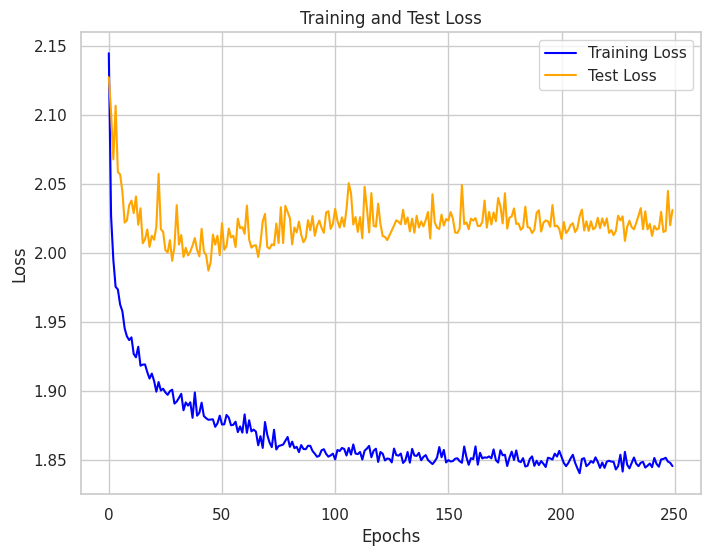

In [ ]:
# Retrieve training and validation losses from the history object
training_loss = loss_history.history['loss']
validation_loss = loss_history.history['val_loss']

# Create a plot
plt.figure(figsize=(8, 6))

# Plot training and validation losses
plt.plot(training_loss, label='Training Loss', color='blue')
plt.plot(validation_loss, label='Test Loss', color='orange')

# Set plot title and labels
plt.title('Training and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


plt.show()

#### Métricas

In [ ]:
# Make predictions on the test set using the best model
y_pred = best_reg_nn.predict(x_test)

# Evaluate the final model using R^2 score
mae = mean_absolute_error(y_reg_test, y_pred)

print(mae)

95/95 [==============================] - 0s 2ms/step
2.0308257452684715


El MAE = 1,99 mejoró aún más en la red neuronal al optimizar los hiperparámetros.

## Explicabilidad

In [ ]:
!pip install shap -q
import shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 3.5 MB/s eta 0:00:00


### Global de la regresión lineal

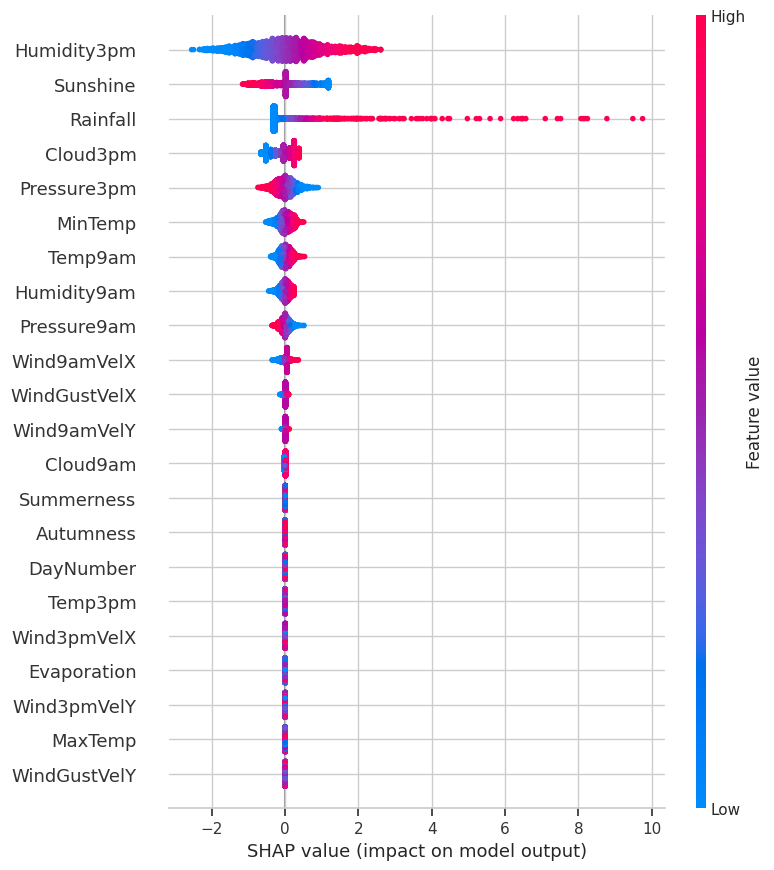

In [ ]:
explainer = shap.Explainer(best_lin_reg, x_train, feature_names=df_x_train.columns)

explanation = explainer(x_test)

shap.plots.beeswarm(explanation, max_display=None)

### Global de la regresión logística

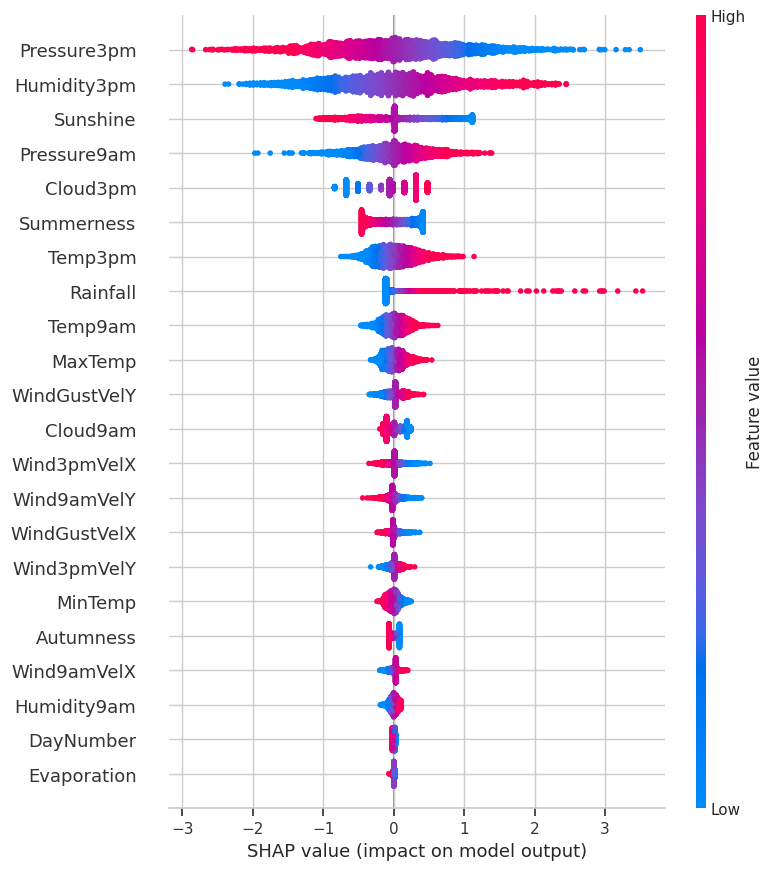

In [ ]:
explainer = shap.Explainer(best_log_reg, x_train, feature_names=df_x_train.columns)

explanation = explainer(x_test)

shap.plots.beeswarm(explanation, max_display=None)

### Global de la red neuronal de clasificación

PermutationExplainer explainer: 3023it [03:21, 14.60it/s]


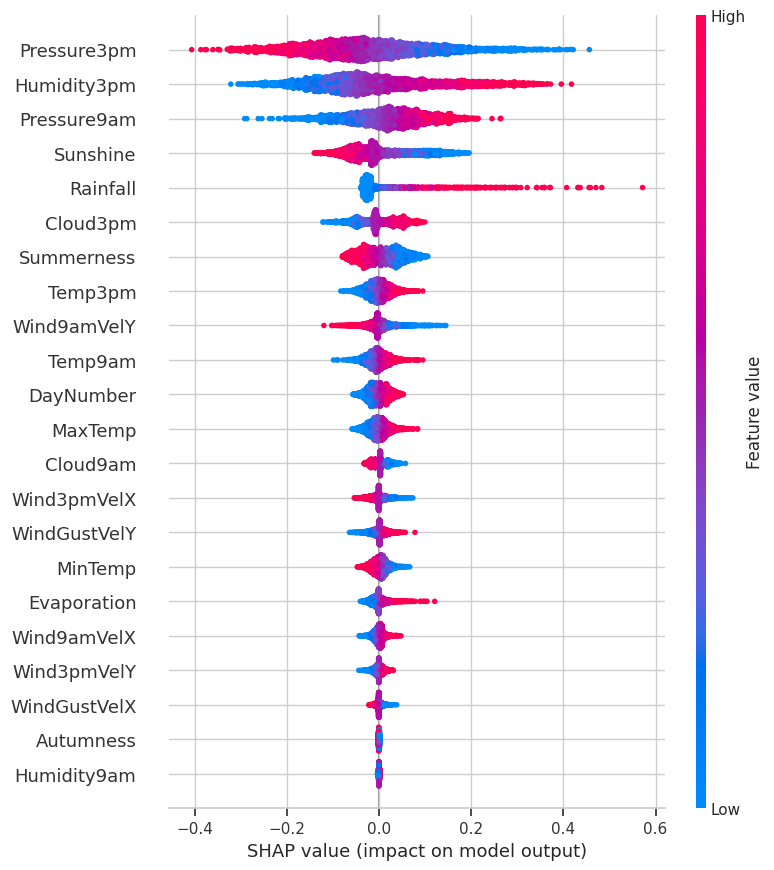

In [ ]:
explainer = shap.Explainer(best_class_nn.model, x_train2, feature_names=df_x_train.columns)

explanation = explainer(x_test)

shap.plots.beeswarm(explanation, max_display=None)

### Global de la red neuronal de regresión

PermutationExplainer explainer: 3023it [02:34, 18.11it/s]


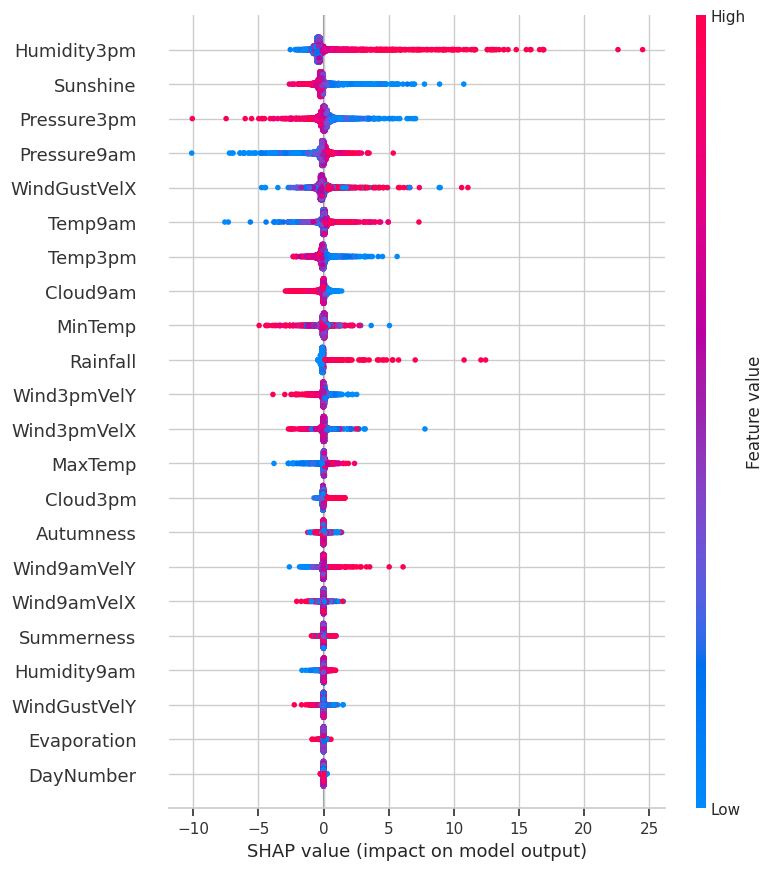

In [ ]:
explainer = shap.Explainer(best_reg_nn.model, x_train, feature_names=df_x_train.columns)

explanation = explainer(x_test)

shap.plots.beeswarm(explanation, max_display=None)

### Local de la red neuronal de regresión

In [ ]:
base_value = np.mean(y_reg_train)
# Usamos el explainer que fiteamos recién
shap_values = explainer.shap_values(x_test)

PermutationExplainer explainer: 3023it [01:14, 36.34it/s]


In [ ]:
i = 42;

In [ ]:
explanation = shap.Explanation(values=shap_values[i], base_values=base_value, feature_names=df_x_train.columns)

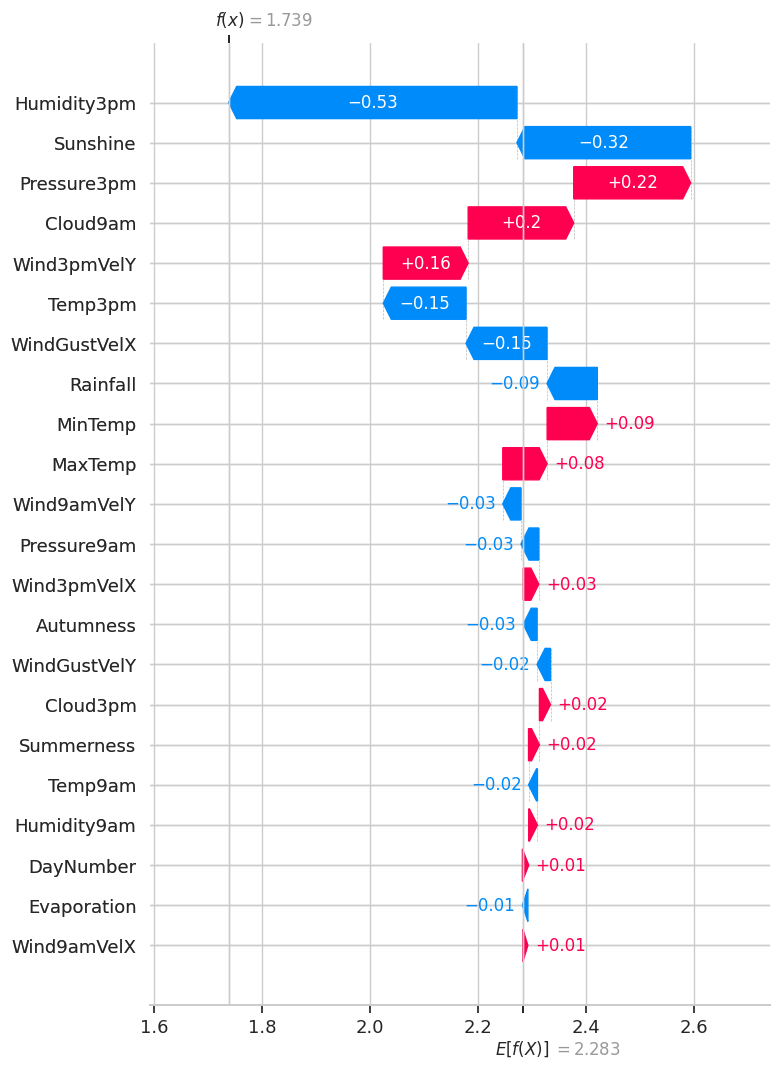

In [ ]:
shap.plots.waterfall(explanation, max_display=m)

Valor final = 1,74

In [ ]:
print('Valor real =', best_reg_nn.predict(x_test[i].reshape(1, -1))[0][0])

1/1 [==============================] - 0s 125ms/step
Valor real 1.4796734


In [ ]:
print('Desviación estándar =', y_reg_train.std())

Rango: 7.4078205944329785


Aunque la predicción real está algo lejos de lo calculado por Shap, teniendo en cuenta que la variable tiene una desviación estándar de 7,41, parece una aproximación suficientemente buena.

## MLOps

### Pipelines

Ponemos en pipelines los dos modelos que vamos a usar

In [ ]:
regresion = Pipeline([
    ('model', best_reg_nn)
])

In [ ]:
clasificacion = Pipeline([
    ('model', best_class_nn)
])

Exportamos las 3 pipelines

In [ ]:
joblib.dump(preprocesamiento, 'preprocesamiento.joblib')
joblib.dump(regresion, 'regresion.joblib')
joblib.dump(clasificacion, 'clasificacion.joblib');


## Conclusión del trabajo

Elegimos modelos de redes neuronales para utilizar sobre opciones tradicionales como regresión logística, regresión lineal como Lasso, Ridge, Elasticnet, y demás modelos propuestos, debido a las mejoras notables en métricas clave, como precisión y  el promedio de F1-score. Las redes neuronales sobresalen en capturar patrones complejos y no lineales en datos del mundo real, gracias a su capacidad de aprendizaje no lineal, representación jerárquica y  la capacidad de regularización integrada que contribuyen a un rendimiento más efectivo.

Esto influyó dando mejores resultados en la mayoría de los modelos de regresión; con una mejora clara respecto al modelo base (de un MAE de 3,5 a 2,0).

En clasificación podriamos haber elegido como nuestro modelo a considerar el de RandomForest el cual fue utilizado como modelo base de clasifición y llegó a lograr  un buen número de F1 = 0.7809282234382706 superando a la red nuronal de clasificación, la cual logró un F1= 0.7504033073001584. Como es poca la diferencia en la métrica, haber usado cualquiera de estos dos modelos hubiera estado bien.

Además pensamos que los resulados podrían ser mejorables con más tiempo de entrenamiento, afinación de hiperparámetros, y probando otras formas de procesar los datos, como manteniendo las locaciones o imputando los datos con interpolaciones. O al contrario podría ser que la naturaleza del problema no tiene más patrones significativos para aprender o se necesitarían de más datos para poder hacerlo.